## Installs

In [1]:
!pip install scikit-image

   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.8 MB 1.9 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/12.8 MB 2.9 MB/s eta 0:00:04
   ------ --------------------------------- 2.1/12.8 MB 3.3 MB/s eta 0:00:04
   -------- ------------------------------- 2.6/12.8 MB 3.5 MB/s eta 0:00:03
   ---------- ----------------------------- 3.4/12.8 MB 3.3 MB/s eta 0:00:03
   ------------- -------------------------- 4.2/12.8 MB 3.4 MB/s eta 0:00:03
   ------------- -------------------------- 4.5/12.8 MB 3.2 MB/s eta 0:00:03
   ------------- -------------------------- 4.5/12.8 MB 3.2 MB/s eta 0:00:03
   -------------- ------------------------- 4.7/12.8 MB 2.7 MB/s eta 0:00:04
   --------------- ------------------------ 5.0/12.8 MB 2.5 MB/s eta 0:00:04
   --------------- ------------------------ 5.0/12.8 MB 2.5 MB/s eta 0:00:04
   ---------------- ----------------------- 5.2/12.8 MB 2.2 MB/s eta 0:00:04
   ---

In [2]:
!pip install opencv-python pillow 


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
    --------------------------------------- 0.5/38.8 MB 3.4 MB/s eta 0:00:12
   - -------------------------------------- 1.3/38.8 MB 4.0 MB/s eta 0:00:10
   -- ------------------------------------- 2.1/38.8 MB 3.8 MB/s eta 0:00:10
   -- ------------------------------------- 2.6/38.8 MB 3.4 MB/s eta 0:00:11
   --- ------------------------------------ 3.1/38.8 MB 3.2 MB/s eta 0:00:12
   ---- ----------------------------------- 3.9/38.8 MB 3.3 MB/s eta 0:00:11
   ---- ----------------------------------- 4.5/38.8 MB 3.2 MB/s eta 0:00:11
   ----- ---------------------------------- 5.2/38.8 MB 3.3 MB/s eta 0:00:11
   ----- ---------------------------------- 5.5/38.8 MB 3.2 MB/s eta 0:00:11
   ----- ---------------------------------- 5.5/38.8 MB 3.2 MB/s eta 0:00:11
   ----- ---------------------------------- 5.8/38.8 MB 2.7 MB/s eta 0:00:13
   ------ --------------------------------- 6.0/38.8 MB 2.5 MB/s eta 0:00:13
   ---

## Load Images

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage import feature
from skimage import measure
from PIL import Image
import matplotlib.pyplot as plt

# Function to load all images from a folder
def load_images_from_folder(folder):
    images = []
    file_names = os.listdir(folder)  # List all files in the folder
    for filename in file_names:
        if filename.endswith(".JPG") :  # Add other formats if needed
            img = cv2.imread(os.path.join(folder, filename))  # Read the image
            if img is not None:
                images.append(img)
    return images

# Folder containing your dataset
folder_path_r = 'Rhizophora'  # Rhizophora_apiculata
images_r = load_images_from_folder(folder_path_r)

# Folder containing your dataset
folder_path_a = 'Avicenna'  # Avicenna_alba
images_a = load_images_from_folder(folder_path_a)

# Folder containing your dataset
folder_path_s = 'Sonneratia'  # Sonneratia_alba
images_s = load_images_from_folder(folder_path_s)

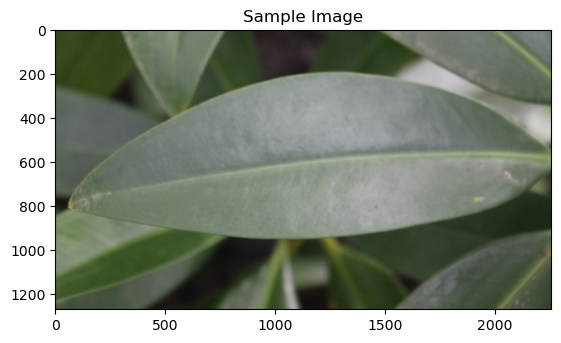

In [3]:
# Display a sample image
plt.imshow(cv2.cvtColor(images_r[0], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
plt.title('Sample Image')
plt.show()

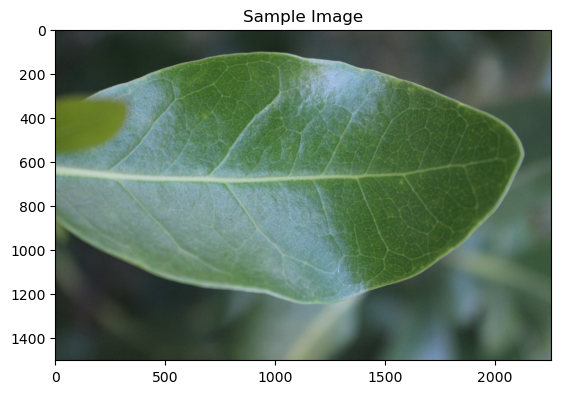

In [3]:
# Display a sample image
plt.imshow(cv2.cvtColor(images_a[0], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
plt.title('Sample Image')
plt.show()

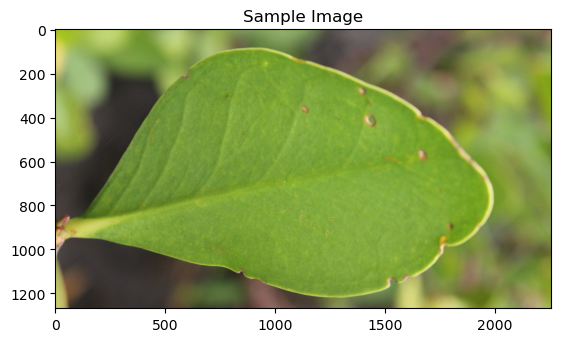

In [4]:
# Display a sample image
plt.imshow(cv2.cvtColor(images_s[0], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
plt.title('Sample Image')
plt.show()

## Feature Extraction

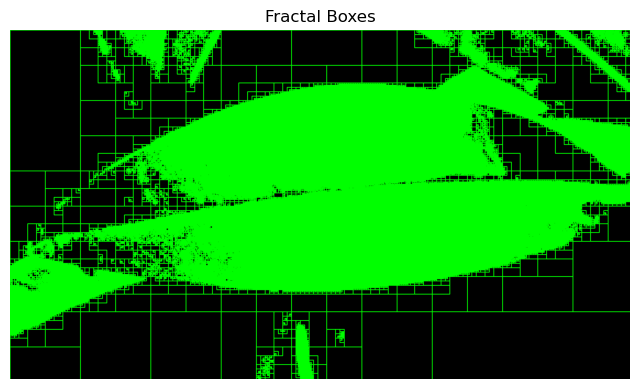

In [13]:
def visualize_fractal_boxes(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold the image to binary
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    
    # Create a copy of the binary image for visualization
    visual_image = np.zeros_like(binary_image)
    visual_image = cv2.cvtColor(visual_image, cv2.COLOR_GRAY2BGR)
    
    # Calculate box sizes (powers of 2)
    sizes = 2 ** np.arange(1, int(np.log2(min(binary_image.shape))), 1)
    
    # Iterate through each box size
    for size in sizes:
        for y in range(0, binary_image.shape[0], size):
            for x in range(0, binary_image.shape[1], size):
                # Extract the box
                box = binary_image[y:y + size, x:x + size]
                if np.sum(box) > 0:  # If any pixel inside the box is white
                    # Draw the box on the visualization image
                    cv2.rectangle(visual_image, (x, y), (x + size, y + size), (0, 255, 0), 2)  # Green boxes

    # Display the fractal boxes
    plt.figure(figsize=(8, 8))
    plt.title("Fractal Boxes")
    plt.imshow(cv2.cvtColor(visual_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

visualize_fractal_boxes(images_r[0])


In [5]:
def fractal_dimension(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold the image to binary
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    
    # Calculate the box-counting fractal dimension
    sizes = 2 ** np.arange(1, int(np.log2(min(binary_image.shape))), 1)  # Powers of 2
    counts = []
    
    for size in sizes:
        count = 0
        for y in range(0, binary_image.shape[0], size):
            for x in range(0, binary_image.shape[1], size):
                # Extract the box
                box = binary_image[y:y + size, x:x + size]
                if np.sum(box) > 0:  # If any pixel inside the box is white
                    count += 1
        counts.append(count)
    
    # Remove zero counts and corresponding box sizes to avoid log(0)
    valid_counts = np.array(counts)
    valid_sizes = np.array(sizes)
    nonzero_indices = valid_counts > 0
    valid_counts = valid_counts[nonzero_indices]
    valid_sizes = valid_sizes[nonzero_indices]
    
    # Log-log transformation
    log_counts = np.log(valid_counts)
    log_sizes = np.log(valid_sizes)
    
    # Linear fit: log(count) = fractal_dim * log(box_size) + const
    fractal_dim = -np.polyfit(log_sizes, log_counts, 1)[0]
    
    return fractal_dim


In [6]:
def entropy(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Normalize pixel values to the range [0, 1]
    normalized_image = gray_image / 255.0  # Ensure values are in [0, 1]
    
    # Calculate histogram
    hist, _ = np.histogram(normalized_image, bins=256, range=(0, 1), density=False)
    hist = hist / hist.sum()  # Normalize to create a probability distribution
    
    # Calculate entropy
    hist = hist[hist > 0]  # Remove zero values to avoid log(0)
    entropy_value = -np.sum(hist * np.log2(hist))  # Shannon Entropy
    
    return entropy_value

In [7]:

#gabor filter represents a combination of gaussian (represents the weights) and sinusoidal terms (directionality)

#mimics visual filter of humans

def gabor_filter(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    frequencies = [0.05, 0.1, 0.2, 0.3]
    ksize=5
    #large sigma on smaller features, can result in overlooking the features
    orientations=[0,np.pi/4,np.pi/2,3*np.pi/4] #pi/2 - horizontal filter, pi/1- vertical filter
    # as per the orientation, we only see those features that are at that angle

    features=[]

    for frequency in frequencies:
        for orientation in orientations:
            kernel=cv2.getGaborKernel((ksize,ksize),
                                      sigma=2.0,theta=orientation,
                                      lambd=1/frequency,gamma=1.0,
                                         ktype=cv2.CV_32F) 
            #after generating all the values from the kernel, represent it as 32 ,i.e, 

            filtered_image = cv2.filter2D(gray_image, cv2.CV_32F, kernel)

            #plt.imshow(filtered_image)
            #plt.show()

             # Calculate energy (mean of squared values)
            energy = np.mean(filtered_image**2) #denotes the texture
            features.append(energy)
            
    return features

In [8]:
def chlorophyll_content(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    r_channel, g_channel, b_channel = cv2.split(image_rgb)
    #The chlorophyll content primarily influences the green channel, 
    #so analyzing the green intensity relative to red and blue is essential.

    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h_channel, s_channel, v_channel = cv2.split(image_hsv)
    #Use the hue and saturation channels from the HSV color space,
    #which better represent the dominant colors and their intensity.

    gr_features=gr_ratio(g_channel,r_channel)
    
   # gcc_features=gcc(g_channel,r_channel,b_channel)

    exg_features=exg(r_channel,g_channel,b_channel)

    hue_features=np.mean(h_channel)
    
    cai_features=cai(image)

    features_list = gr_features + exg_features + [hue_features] + cai_features
    features_list = np.array(features_list).reshape(1, -1)

    df = pd.DataFrame(features_list, columns=["Mean GR","Min GR", "Max GR","Mean EXG","Min EXG", "Max EXG","Hue Space","Mean CAI","Min CAI", "Max CAI"])
    
    return df

In [9]:
def gr_ratio(g_channel,r_channel):
    gr_ratio=g_channel/(r_channel+ 1e-5) 
    mean_gr = np.mean(gr_ratio)
    min_gr = np.min(gr_ratio)
    max_gr=np.max(gr_ratio)
    return [mean_gr,min_gr,max_gr]

In [10]:
def gcc(green,red,blue):
    denominator = green + red
    if np.any(denominator == 0):
        return [0,0,0]  # or some small value
    gcc= (green - red) / denominator
    gcc = np.nan_to_num(gcc, nan=0, posinf=0, neginf=0)
    mean_gcc = np.mean(gcc)
    min_gcc = np.min(gcc)
    max_gcc=np.max(gcc)
    return [mean_gcc,min_gcc,max_gcc]

In [11]:
def exg(r_channel,g_channel,b_channel):
    exg= 2* g_channel - r_channel-b_channel
    mean_exg = np.mean(exg)
    min_exg = np.min(exg)
    max_exg=np.max(exg)
    return [mean_exg,min_exg,max_exg]

In [12]:
def cai(image):
    image_norm=image/255.0
    rs_channel, gs_channel, bs_channel = cv2.split(image_norm)
    cai= (rs_channel-bs_channel)/(rs_channel+bs_channel)
    mean_cai = np.mean(cai)
    min_cai = np.min(cai)
    max_cai=np.max(cai)
    return [mean_cai,min_cai,max_cai]

In [13]:
len(images_s)

70

## Features of Rhizophora

In [217]:
#df_rhizo = pd.DataFrame(columns=["Entropy", "Fractal Dimension"] + [f"Gabor Feature {i+1}" for i in range(16)] +
 #          ["Mean GR", "Min GR", "Max GR", "Mean EXG", "Min EXG", "Max EXG",
  #       "Mean Hue", "Mean CAI", "Min CAI", "Max CAI"])

# Adjust Gabor features length - 16 gabor features (4x4) 

texture_features_list = []

for idx in range(60, 100):  # Update to iterate over your desired image indices
    fractal_dim = fractal_dimension(images_r[idx])
    entropy_value = entropy(images_r[idx])
    texture_features = gabor_filter(images_r[idx])
    chlorophyll_df = chlorophyll_content(images_r[idx])

    # Combine features into a single list
    features = [entropy_value, fractal_dim] + texture_features + chlorophyll_df.iloc[0].tolist()

    # Create a temporary DataFrame to hold the features for the current image
    temp_df = pd.DataFrame([features], columns=df_rhizo.columns)
    
    # Append the temporary DataFrame to the main DataFrame
    df_rhizo = pd.concat([df_rhizo, temp_df], ignore_index=True)

In [218]:
df_rhizo.head(10)

Entropy  Fractal Dimension  Gabor Feature 1  Gabor Feature 2  \
0  7.232475           1.793365        36.403687        57.873650   
1  7.318153           1.732256        57.282681       129.475128   
2  7.291966           1.808949        96.416046       223.412079   
3  7.306464           1.742554        58.256100       127.800354   
4  7.345132           1.726070        66.140549       157.314117   
5  7.304919           1.723749        62.448223       140.495163   
6  7.167751           1.690791        59.545372        89.767387   
7  7.160244           1.815412        84.406219       126.997742   
8  7.253009           1.804659       103.698349       138.860718   
9  6.812335           1.752754        76.242844       133.215729   

   Gabor Feature 3  Gabor Feature 4  Gabor Feature 5  Gabor Feature 6  \
0        73.741005        49.422955       106.885391       156.246857   
1       154.868103        77.068062       167.535492       349.139618   
2       327.402557       188.509705       279.264862       596.934204   
3       152.734299        77.612167       170.360550       344.674500   
4       227.229660       127.841400       192.059433       418.736084   
5       224.181168       138.093201       181.461960       373.803925   
6       125.123627        89.965942       173.206787       240.800415   
7       156.784653       107.938705       245.217117       341.023163   
8       156.059814       114.205093       301.308990       373.093658   
9       149.756424        86.853264       221.843903       359.217651   

   Gabor Feature 7  Gabor Feature 8  ...   Mean GR    Min GR    Max GR  \
0       214.331024       133.883942  ...  1.122009  0.629629  1.838709   
1       449.532532       206.192612  ...  1.031461  0.363636  1.729729   
2       952.694824       503.009064  ...  1.497304  0.437500  2.349999   
3       443.454956       207.788696  ...  1.022958  0.376623  1.794117   
4       658.506165       341.078003  ...  1.138947  0.311594  1.851852   
5       650.002625       368.757629  ...  1.143403  0.315385  1.947368   
6       362.676971       240.774109  ...  1.113206  0.500000  1.862068   
7       454.602966       290.133087  ...  1.149259  0.362637  1.999999   
8       452.582855       307.431366  ...  1.140795  0.340909  1.911764   
9       436.159790       233.376953  ...  1.157760  0.385417  1.682926   

     Mean EXG  Min EXG  Max EXG   Mean Hue  Mean CAI   Min CAI   Max CAI  
0   36.316698      0.0    255.0  54.737317 -0.063421 -0.636364  0.066667  
1  120.518040      0.0    255.0  68.298833 -0.080272 -0.680851  0.090909  
2  116.117510      0.0    255.0  61.285730 -0.076778 -0.818182  0.170213  
3  122.550294      0.0    255.0  67.213883 -0.082809 -0.688889  0.128205  
4   60.196937      0.0    255.0  46.012830 -0.099300 -0.682540  0.200000  
5   62.141922      0.0    255.0  45.053382 -0.099272 -0.666667  0.142857  
6   56.625916      0.0    255.0  52.886594 -0.070718 -0.807692  0.172414  
7   56.161486      0.0    255.0  52.842688 -0.074538 -0.702970  0.179487  
8   55.906768      0.0    255.0  52.167934 -0.079072 -1.000000  0.100000  
9   45.780904      0.0    255.0  52.417637 -0.051543 -0.880597  0.111111  

[10 rows x 28 columns]

In [219]:
df_rhizo['Species']='Rhizophora'

In [220]:
means = df_rhizo.drop('Species',axis=1).mean()

# Create a new DataFrame to store the results
df_rhizophora = pd.DataFrame([means], columns=df_rhizo.columns)

# Add species label as the first column
df_rhizophora['Species']='Rhizophora'

In [221]:
df_rhizophora.head(5)

Entropy  Fractal Dimension  Gabor Feature 1  Gabor Feature 2  \
0  7.164307           1.805348        66.941063       120.160255   

   Gabor Feature 3  Gabor Feature 4  Gabor Feature 5  Gabor Feature 6  \
0       173.209839       113.496536       194.312164       321.982788   

   Gabor Feature 7  Gabor Feature 8  ...    Min GR    Max GR    Mean EXG  \
0       502.801575       303.536438  ...  0.499376  2.113804  104.157278   

   Min EXG  Max EXG   Mean Hue  Mean CAI   Min CAI   Max CAI     Species  
0      0.0    255.0  53.780917 -0.151492 -0.830334  0.148614  Rhizophora  

[1 rows x 29 columns]

In [222]:
df_rhizo.to_csv("Rhizophora_data.csv", index=False)

## Features of Avicenna

In [26]:
#df_avi = pd.DataFrame(columns=["Entropy", "Fractal Dimension"] + [f"Gabor Feature {i+1}" for i in range(16)] +
 #              "Mean Hue", "Mean CAI", "Min CAI", "Max CAI"])

# Adjust Gabor features length - 16 gabor features (4x4) 

texture_features_list = []

for idx in range(30, 70):  # Update to iterate over your desired image indices
    fractal_dim = fractal_dimension(images_a[idx])
    entropy_value = entropy(images_a[idx])
    texture_features = gabor_filter(images_a[idx])
    chlorophyll_df = chlorophyll_content(images_a[idx])

    # Combine features into a single list
    features = [entropy_value, fractal_dim] + texture_features + chlorophyll_df.iloc[0].tolist()

    # Create a temporary DataFrame to hold the features for the current image
    temp_df = pd.DataFrame([features], columns=df_avi.columns)
    
    # Append the temporary DataFrame to the main DataFrame
    df_avi= pd.concat([df_avi, temp_df], ignore_index=True)

In [27]:
df_avi['Species']="Avicenna"

In [28]:
df_avi.head()

Entropy  Fractal Dimension  Gabor Feature 1  Gabor Feature 2  \
0  7.119122           1.751729       115.478027       143.599579   
1  6.870265           1.779287       112.563652       121.083138   
2  6.993077           1.763675       107.284142       114.049736   
3  6.450565           1.800004        78.206528        77.714012   
4  6.438901           1.783177        79.100266        78.961945   

   Gabor Feature 3  Gabor Feature 4  Gabor Feature 5  Gabor Feature 6  \
0       176.571503       141.010757       337.461670       387.684479   
1       141.412231       126.521599       328.452820       327.602570   
2       179.641525       165.311493       311.232025       305.311005   
3       106.612350       102.560822       228.557617       210.408005   
4       109.148216       104.641739       231.022018       213.599945   

   Gabor Feature 7  Gabor Feature 8  ...    Min GR    Max GR   Mean EXG  \
0       513.142944       381.085846  ...  0.836363  2.083333  47.898462   
1       411.359222       342.188690  ...  0.878505  1.862069  77.404397   
2       521.195496       443.988983  ...  0.779762  1.816326  58.553846   
3       310.736328       279.393768  ...  0.865385  1.644737  74.765368   
4       318.085663       284.911011  ...  0.864078  1.649350  74.445522   

   Min EXG  Max EXG   Mean Hue  Mean CAI   Min CAI   Max CAI   Species  
0      0.0    255.0  67.835349  0.006852 -0.603604  0.261538  Avicenna  
1      0.0    255.0  44.929132 -0.163661 -0.664804  0.162791  Avicenna  
2      0.0    255.0  56.942865 -0.034177 -0.416149  0.224806  Avicenna  
3      0.0    255.0  44.864392 -0.171195 -0.754386  0.089744  Avicenna  
4      0.0    255.0  44.409424 -0.175427 -0.760684  0.093333  Avicenna  

[5 rows x 29 columns]

In [29]:
means = df_avi.drop('Species',axis=1).mean()

# Create a new DataFrame to store the results
df_avicenna = pd.DataFrame([means], columns=df_avi.columns)

# Add species label as the first column
df_avicenna['Species']="Avicenna"

In [30]:
df_avicenna.head()

Entropy  Fractal Dimension  Gabor Feature 1  Gabor Feature 2  \
0  7.175691           1.771234       100.074341       128.122482   

   Gabor Feature 3  Gabor Feature 4  Gabor Feature 5  Gabor Feature 6  \
0       158.784103       124.077942       291.393616       345.398529   

   Gabor Feature 7  Gabor Feature 8  ...    Min GR   Max GR   Mean EXG  \
0       461.229858       334.126892  ...  0.745257  1.94758  68.392562   

   Min EXG  Max EXG   Mean Hue  Mean CAI  Min CAI  Max CAI   Species  
0      0.0    255.0  61.482474 -0.050354 -0.57632  0.26151  Avicenna  

[1 rows x 29 columns]

In [31]:
df_avi.to_csv("Avicenna_data.csv", index=False)

## Features of Sonneratia

In [35]:
#df_son = pd.DataFrame(columns=["Entropy", "Fractal Dimension"] + [f"Gabor Feature {i+1}" for i in range(16)] +
 #              ["Mean GR", "Min GR", "Max GR", "Mean EXG", "Min EXG", "Max EXG",
  #              "Mean Hue", "Mean CAI", "Min CAI", "Max CAI"])

# Adjust Gabor features length - 16 gabor features (4x4) 

texture_features_list = []

for idx in range(50, 70):  # Update to iterate over your desired image indices
    fractal_dim = fractal_dimension(images_s[idx])
    entropy_value = entropy(images_s[idx])
    texture_features = gabor_filter(images_s[idx])
    chlorophyll_df = chlorophyll_content(images_s[idx])

    # Combine features into a single list
    features = [entropy_value, fractal_dim] + texture_features + chlorophyll_df.iloc[0].tolist()

    # Create a temporary DataFrame to hold the features for the current image
    temp_df = pd.DataFrame([features], columns=df_son.columns)
    
    # Append the temporary DataFrame to the main DataFrame
    df_son= pd.concat([df_son, temp_df], ignore_index=True)

In [36]:
df_son.shape

(70, 28)

In [37]:
df_son['Species']="Sonneratia"

In [38]:
df_son.head()

Entropy  Fractal Dimension  Gabor Feature 1  Gabor Feature 2  \
0  6.716936           1.883814        75.220108        94.739220   
1  7.148496           1.856403        83.418335       117.483414   
2  7.100360           1.828519        87.397736        95.676071   
3  7.100360           1.838484        87.397728        95.676163   
4  6.431461           1.864120        94.422600        81.736519   

   Gabor Feature 3  Gabor Feature 4  Gabor Feature 5  Gabor Feature 6  \
0       131.357132       106.377197       218.733658       254.392258   
1       165.318008       124.667557       242.046280       315.243683   
2        87.949005        75.238716       254.413361       258.279846   
3        87.949043        75.238747       254.413193       258.279968   
4        92.180542       100.122299       274.859100       220.611923   

   Gabor Feature 7  Gabor Feature 8  ...    Min GR    Max GR    Mean EXG  \
0       381.973907       286.226044  ...  0.373239  1.625000  128.139484   
1       480.596497       334.731171  ...  0.559524  2.769229   63.187951   
2       255.723770       203.278214  ...  0.670807  2.363636   72.437703   
3       255.723801       203.278030  ...  0.670807  2.363636   72.437703   
4       268.361572       270.424652  ...  0.813278  1.580645  101.682307   

   Min EXG  Max EXG   Mean Hue  Mean CAI   Min CAI   Max CAI     Species  
0      0.0    255.0  35.360004 -0.311073 -1.000000  0.071429  Sonneratia  
1      0.0    255.0  75.744835  0.066246 -0.521127  0.395349  Sonneratia  
2      0.0    255.0  68.097918  0.036249 -0.580247  0.367089  Sonneratia  
3      0.0    255.0  68.097918  0.036249 -0.580247  0.367089  Sonneratia  
4      0.0    255.0  39.603378 -0.279759 -0.781022 -0.016129  Sonneratia  

[5 rows x 29 columns]

In [39]:
means = df_son.drop('Species',axis=1).mean()

# Create a new DataFrame to store the results
df_sonneratia = pd.DataFrame([means], columns=df_avi.columns)

# Add species label as the first column
df_sonneratia ['Species']="Sonneratia"

In [40]:
df_son.to_csv("Sonneratia_data.csv", index=False)

## Feature set containing entropy, fractal and texture analysis

In [223]:
dataset=pd.concat([df_rhizophora,df_avicenna,df_sonneratia], ignore_index=True)

In [224]:
total_dataset=pd.concat([df_rhizo,df_avi,df_son])

total_dataset.head()

Entropy  Fractal Dimension  Gabor Feature 1  Gabor Feature 2  \
0  7.232475           1.793365        36.403687        57.873650   
1  7.318153           1.732256        57.282681       129.475128   
2  7.291966           1.808949        96.416046       223.412079   
3  7.306464           1.742554        58.256100       127.800354   
4  7.345132           1.726070        66.140549       157.314117   

   Gabor Feature 3  Gabor Feature 4  Gabor Feature 5  Gabor Feature 6  \
0        73.741005        49.422955       106.885391       156.246857   
1       154.868103        77.068062       167.535492       349.139618   
2       327.402557       188.509705       279.264862       596.934204   
3       152.734299        77.612167       170.360550       344.674500   
4       227.229660       127.841400       192.059433       418.736084   

   Gabor Feature 7  Gabor Feature 8  ...    Min GR    Max GR    Mean EXG  \
0       214.331024       133.883942  ...  0.629629  1.838709   36.316698   
1       449.532532       206.192612  ...  0.363636  1.729729  120.518040   
2       952.694824       503.009064  ...  0.437500  2.349999  116.117510   
3       443.454956       207.788696  ...  0.376623  1.794117  122.550294   
4       658.506165       341.078003  ...  0.311594  1.851852   60.196937   

   Min EXG  Max EXG   Mean Hue  Mean CAI   Min CAI   Max CAI     Species  
0      0.0    255.0  54.737317 -0.063421 -0.636364  0.066667  Rhizophora  
1      0.0    255.0  68.298833 -0.080272 -0.680851  0.090909  Rhizophora  
2      0.0    255.0  61.285730 -0.076778 -0.818182  0.170213  Rhizophora  
3      0.0    255.0  67.213883 -0.082809 -0.688889  0.128205  Rhizophora  
4      0.0    255.0  46.012830 -0.099300 -0.682540  0.200000  Rhizophora  

[5 rows x 29 columns]

In [225]:
total_dataset.to_csv("total_mangroove_data.csv", index=False)
dataset.to_csv("mean_mangroove_data.csv", index=False)

In [226]:
total_dataset.describe()

Entropy  Fractal Dimension  Gabor Feature 1  Gabor Feature 2  \
count  240.000000         240.000000       240.000000       240.000000   
mean     7.094854           1.810351        79.417130       110.832024   
std      0.236538           0.050100        36.413624        48.093555   
min      6.361181           1.668124        21.792559        27.453428   
25%      6.954760           1.774134        51.438783        74.549606   
50%      7.148645           1.817051        72.061481       100.420216   
75%      7.253478           1.849063       101.008148       139.442501   
max      7.538786           1.894825       206.363235       282.955566   

       Gabor Feature 3  Gabor Feature 4  Gabor Feature 5  Gabor Feature 6  \
count       240.000000       240.000000       240.000000       240.000000   
mean        143.727707       106.425278       230.862991       297.760742   
std          69.576393        47.045696       105.990929       129.959503   
min          29.817644        27.702885        63.294514        73.947418   
25%          91.507597        73.863012       148.869190       199.568996   
50%         127.441509        97.963261       209.143944       268.525269   
75%         188.673645       137.394196       292.694366       374.310318   
max         432.059235       256.047668       604.028198       770.974182   

       Gabor Feature 7  Gabor Feature 8  ...     Mean GR      Min GR  \
count       240.000000       240.000000  ...  240.000000  240.000000   
mean        417.358521       285.689789  ...    1.276498    0.612583   
std         202.433136       126.291924  ...    0.126814    0.153011   
min          86.638023        74.410469  ...    0.991949    0.282353   
25%         264.828484       196.450840  ...    1.184937    0.500000   
50%         369.615646       262.532990  ...    1.253694    0.630889   
75%         548.770386       366.537430  ...    1.345846    0.719920   
max        1260.978149       687.680054  ...    1.622550    0.973333   

           Max GR    Mean EXG  Min EXG  Max EXG    Mean Hue    Mean CAI  \
count  240.000000  240.000000    240.0    240.0  240.000000  240.000000   
mean     2.095122   92.471623      0.0    255.0   55.657314   -0.119545   
std      0.412918   34.415832      0.0      0.0   12.643319    0.119941   
min      1.558823   34.933517      0.0    255.0   30.658828   -0.446302   
25%      1.822192   59.217979      0.0    255.0   45.479922   -0.212924   
50%      1.965517   91.774079      0.0    255.0   55.481365   -0.080574   
75%      2.251602  121.188678      0.0    255.0   65.154558   -0.034268   
max      4.057142  162.521939      0.0    255.0   97.171785    0.073773   

          Min CAI     Max CAI  
count  240.000000  240.000000  
mean    -0.721457    0.195102  
std      0.226979    0.126732  
min     -1.000000   -0.031746  
25%     -1.000000    0.101087  
50%     -0.715131    0.171573  
75%     -0.517241    0.283693  
max     -0.241379    0.548387  

[8 rows x 28 columns]

In [227]:
total_dataset['Species'].unique()

array(['Rhizophora', 'Avicenna', 'Sonneratia'], dtype=object)

In [228]:
dataset.head()

Entropy  Fractal Dimension  Gabor Feature 1  Gabor Feature 2  \
0  7.164307           1.805348        66.941063       120.160255   
1  7.175691           1.771234       100.074341       128.122482   
2  6.914797           1.856617        76.582863        80.215530   

   Gabor Feature 3  Gabor Feature 4  Gabor Feature 5  Gabor Feature 6  \
0       173.209839       113.496536       194.312164       321.982788   
1       158.784103       124.077942       291.393616       345.398529   
2        86.553970        78.670792       222.547806       215.519943   

   Gabor Feature 7  Gabor Feature 8  ...    Min GR    Max GR    Mean EXG  \
0       502.801575       303.536438  ...  0.499376  2.113804  104.157278   
1       461.229858       334.126892  ...  0.745257  1.947580   68.392562   
2       251.425674       211.757462  ...  0.641633  2.215975   99.856890   

   Min EXG  Max EXG   Mean Hue  Mean CAI   Min CAI   Max CAI     Species  
0      0.0    255.0  53.780917 -0.151492 -0.830334  0.148614  Rhizophora  
1      0.0    255.0  61.482474 -0.050354 -0.576320  0.261510    Avicenna  
2      0.0    255.0  52.512722 -0.143097 -0.711056  0.195107  Sonneratia  

[3 rows x 29 columns]

In [229]:
dataset.shape

(3, 29)

Avicenna  and Sonnertia has slightly higher entropy than Rhizophora, implying their leaf textures might be more complex or have more diverse pixel intensities.

## Gabor Filter Basic

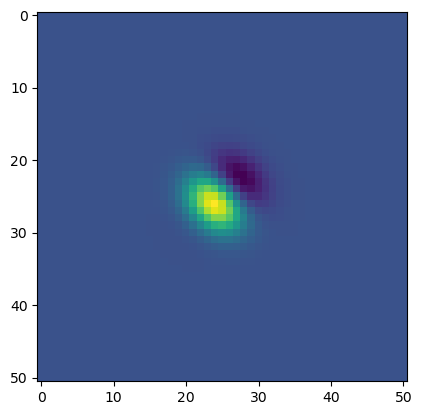

In [7]:
ksize=50
sigma=3 #large sigma on smaller features, can result in overlooking the features
#orientations=[0,np.pi/4,np.pi/2,3*np.pi/4] #pi/2 - horizontal filter, pi/1- vertical filter
theta=3*np.pi/4
lambd=1/0.05
gamma=1
phi=1
    
gabor=cv2.getGaborKernel((ksize,ksize),sigma,theta,lambd,gamma,phi,ktype=cv2.CV_32F) 
    #after generating all the values from the kernel, represent it as 32 ,i.e, float

plt.imshow(gabor)

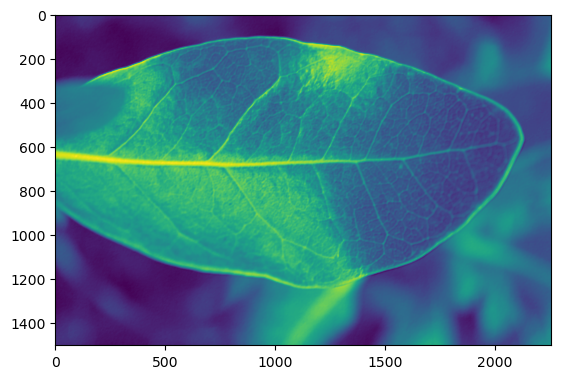

In [103]:
gray_image = cv2.cvtColor(images_a[0], cv2.COLOR_BGR2GRAY)
filtered_image = cv2.filter2D(gray_image, cv2.CV_32F, gabor)

plt.imshow(filtered_image)

## Chlorophyll Content

In [138]:
image_rgb = cv2.cvtColor(images_r[0], cv2.COLOR_BGR2RGB)
r_channel, g_channel, b_channel = cv2.split(image_rgb)
#The chlorophyll content primarily influences the green channel, 
#so analyzing the green intensity relative to red and blue is essential.

image_hsv = cv2.cvtColor(images_r[0], cv2.COLOR_BGR2HSV)
h_channel, s_channel, v_channel = cv2.split(image_hsv)
#Use the hue and saturation channels from the HSV color space,
#which better represent the dominant colors and their intensity.

Green-to-Red Ratio (GR ratio) : Healthy leaves typically have a higher green-to-red ratio due to high chlorophyll content.


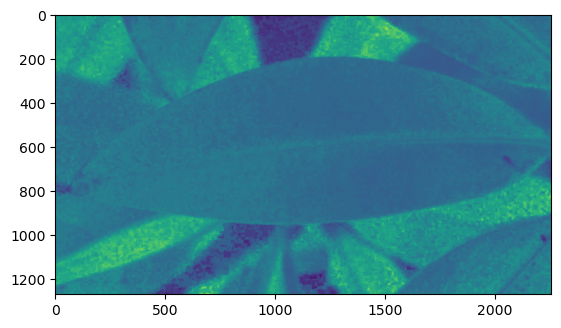

In [58]:
gr_ratio=g_channel/(r_channel+ 1e-5)
plt.imshow(gr_ratio)

Green Chromatic Coordinate : GCC measures the proportion of green in the image, which correlates with chlorophyll levels.

C:\Users\TANISTHA\AppData\Local\Temp\ipykernel_13216\358718060.py:1: RuntimeWarning: divide by zero encountered in divide
  gcc=g_channel/(r_channel+g_channel+b_channel)


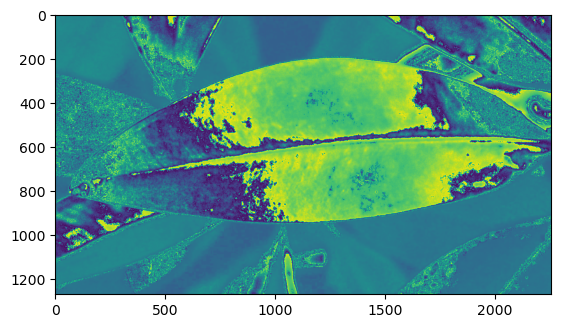

In [139]:
gcc=g_channel/(r_channel+g_channel+b_channel)

gcc_map = (gcc* 255).astype(np.uint8)
plt.imshow(gcc_map)

In [142]:
gcc

array([[0.45402299, 0.46540881, 0.46296296, ..., 1.40963855, 1.5915493 ,
        1.77419355],
       [0.46540881, 0.46296296, 0.45402299, ..., 1.40963855, 1.54054054,
        1.70769231],
       [0.46540881, 0.45833333, 0.45833333, ..., 1.40963855, 1.49350649,
        1.5915493 ],
       ...,
       [0.37662338, 0.37777778, 0.37899543, ..., 0.38922156, 0.39130435,
        0.3902439 ],
       [0.37662338, 0.37777778, 0.37962963, ..., 0.38823529, 0.3902439 ,
        0.39130435],
       [0.37662338, 0.37777778, 0.37899543, ..., 0.38636364, 0.38823529,
        0.3902439 ]])

In [146]:
# Replace Inf and NaN values with 0 (or another value)
gcc = np.nan_to_num(gcc, nan=0, posinf=0, neginf=0)

# Now calculate mean
mean_gcc = np.max(gcc)
print("Mean GCC:", mean_gcc)


print("Any NaN values in gcc:", np.isnan(gcc).any())
print("Any Inf values in gcc:", np.isinf(gcc).any())


Mean GCC: 184.0
Any NaN values in gcc: False
Any Inf values in gcc: False


Excess Green Index : enhances the green channel to emphasize chlorophyll-rich areas.

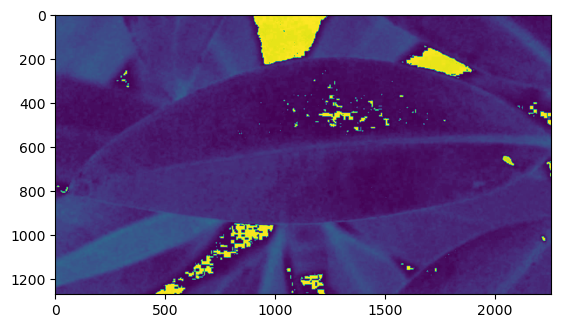

In [55]:
exg= 2* g_channel - r_channel-b_channel
plt.imshow(exg)

Hue value from HSV space : In the HSV color space, the Hue component indicates the dominant color. Healthy leaves with higher chlorophyll content will have a hue closer to green.

1. 10° to 30°: Red
2. 30° to 90°: Orange
3. 90° to 150°: Yellow
4. 150° to 210°: Green
5. 210° to 270°: Cyan
6. 270° to 330°: Blue
7. 330° to 360°: Red (again)

54.73731724594671


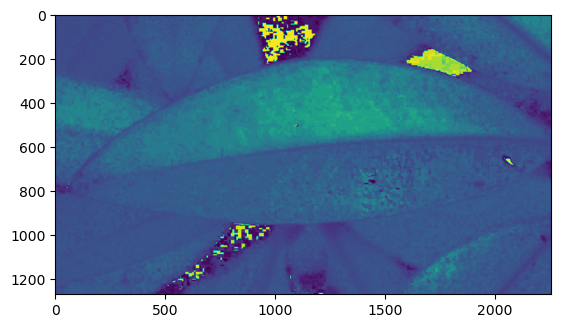

In [62]:
plt.imshow(h_channel)
print(np.mean(h_channel))

Chlorophyll Absorption Ratio Index (CARI) : CARI uses red and green bands to assess chlorophyll absorption.

CAI=( R670 - R720)/(R670 + R720)

R_670: Reflectance at 670 nm (near the red absorption peak of chlorophyll).
R_720: Reflectance at 720 nm (a reference wavelength, often used for healthy plant reflectance).

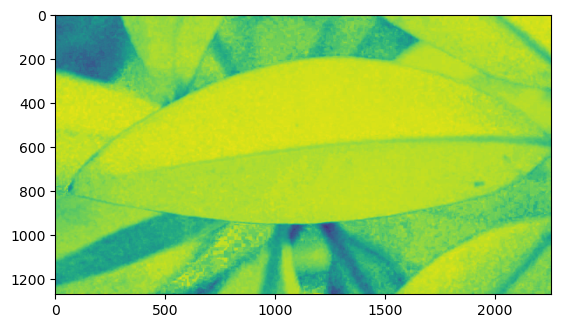

In [74]:
image_s_norm=images_r[0]/255.0
rs_channel, gs_channel, bs_channel = cv2.split(image_s_norm)
cai= (rs_channel-bs_channel)/(rs_channel+bs_channel)
plt.imshow(cai)

The green and yellow regions represent high chlorophyll absorption, and the blue with lower chlorophyll

## PCA Box

In [53]:
!pip install pandas numpy scikit-fuzzy

   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 920.8/920.8 kB 4.7 MB/s eta 0:00:00


In [8]:
total_dataset=pd.read_csv('total_mangroove_data.csv')

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()

In [11]:
total_dataset['Species']=le.fit_transform(total_dataset['Species'])
#dataset['Species']=le.fit_transform(dataset['Species'])

In [12]:
corr=total_dataset.corr()

for i in range(corr.shape[0]):
    corr.iloc[i][i]=0.0

corr.abs().idxmax()

Entropy                Gabor Feature 3
Fractal Dimension              Species
Gabor Feature 1        Gabor Feature 5
Gabor Feature 2        Gabor Feature 6
Gabor Feature 3        Gabor Feature 7
Gabor Feature 4        Gabor Feature 8
Gabor Feature 5        Gabor Feature 1
Gabor Feature 6        Gabor Feature 2
Gabor Feature 7        Gabor Feature 3
Gabor Feature 8        Gabor Feature 4
Gabor Feature 9        Gabor Feature 5
Gabor Feature 10       Gabor Feature 6
Gabor Feature 11       Gabor Feature 7
Gabor Feature 12       Gabor Feature 8
Gabor Feature 13      Gabor Feature 16
Gabor Feature 14      Gabor Feature 16
Gabor Feature 15      Gabor Feature 14
Gabor Feature 16      Gabor Feature 13
Mean GR                         Max GR
Min GR                         Min CAI
Max GR                         Mean GR
Mean EXG                      Mean CAI
Min EXG                        Min EXG
Max EXG                        Max EXG
Mean Hue                      Mean CAI
Mean CAI                 

In [13]:
columns=total_dataset.columns

In [14]:
total_dataset.shape

(240, 29)

In [16]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method='yeo-johnson')
total_dataset[columns] = transformer.fit_transform(total_dataset[columns])

In [18]:
from sklearn.preprocessing import MinMaxScaler

mm=MinMaxScaler()
scaled_dataset=mm.fit_transform(total_dataset)
scaled_df=pd.DataFrame(scaled_dataset,columns=total_dataset.columns)

In [19]:
scaled_df.columns

Index(['Entropy', 'Fractal Dimension', 'Gabor Feature 1', 'Gabor Feature 2',
       'Gabor Feature 3', 'Gabor Feature 4', 'Gabor Feature 5',
       'Gabor Feature 6', 'Gabor Feature 7', 'Gabor Feature 8',
       'Gabor Feature 9', 'Gabor Feature 10', 'Gabor Feature 11',
       'Gabor Feature 12', 'Gabor Feature 13', 'Gabor Feature 14',
       'Gabor Feature 15', 'Gabor Feature 16', 'Mean GR', 'Min GR', 'Max GR',
       'Mean EXG', 'Min EXG', 'Max EXG', 'Mean Hue', 'Mean CAI', 'Min CAI',
       'Max CAI', 'Species'],
      dtype='object')

In [20]:
scaled_df=scaled_df.drop('Species',axis=1)

In [21]:
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2)

In [22]:
pca_2d_data = pca_2d.fit_transform(scaled_df)

In [28]:
pca_reconstruct=pca_2d.inverse_transform(pca_2d_data)

In [29]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(scaled_df,pca_reconstruct))

0.016906802265904915


In [23]:
pca_2d.components_.shape

(2, 28)

In [24]:
# Create a DataFrame from the PCA components (loadings)
components_df = pd.DataFrame(pca_2d.components_, columns=scaled_df.columns)

# Set a threshold for "importance" (e.g., top 5 features with the highest absolute loadings)
top_n = 11

top_features_per_component = []

# Identify the most important features for each principal component
for i in range(components_df.shape[0]):  # Iterate over each principal component
    print(f"\nTop {top_n} features for Principal Component {i+1}:")
    
    # Get the absolute values of the loadings for this component
    component_loadings = components_df.iloc[i].abs()
    
    # Sort the features by absolute loadings and select the top N
    top_features = component_loadings.sort_values(ascending=False).head(top_n)
    
    # Display the most important features
    print(top_features)

    top_features_per_component.append(top_features)


Top 11 features for Principal Component 1:
Gabor Feature 12    0.269006
Gabor Feature 8     0.262604
Gabor Feature 4     0.262090
Gabor Feature 2     0.249410
Gabor Feature 1     0.249075
Gabor Feature 6     0.248921
Gabor Feature 10    0.248255
Gabor Feature 5     0.248058
Gabor Feature 9     0.243021
Gabor Feature 14    0.234541
Gabor Feature 16    0.225454
Name: 0, dtype: float64

Top 11 features for Principal Component 2:
Min CAI             0.515313
Mean CAI            0.422481
Mean EXG            0.372881
Max CAI             0.292824
Mean Hue            0.277653
Gabor Feature 13    0.219792
Min GR              0.214792
Gabor Feature 3     0.129913
Gabor Feature 7     0.129197
Gabor Feature 11    0.123513
Gabor Feature 16    0.123433
Name: 1, dtype: float64


In [25]:
print(f"\nTop {top_n} features for Principal Component {1}:")
    
component_loadings = components_df.iloc[0].abs()

top_features = component_loadings.sort_values(ascending=False).head(top_n)
print(top_features)


Top 11 features for Principal Component 1:
Gabor Feature 12    0.269006
Gabor Feature 8     0.262604
Gabor Feature 4     0.262090
Gabor Feature 2     0.249410
Gabor Feature 1     0.249075
Gabor Feature 6     0.248921
Gabor Feature 10    0.248255
Gabor Feature 5     0.248058
Gabor Feature 9     0.243021
Gabor Feature 14    0.234541
Gabor Feature 16    0.225454
Name: 0, dtype: float64


## PCA Mandel

In [223]:
copied=dataset.copy()

In [224]:
fractals=[1.947021,1.948329,1.951572]

copied['Fractal Dimension']=fractals
copied.head()

Species   Entropy  Fractal Dimension  Gabor Feature 1  Gabor Feature 2  \
0  Rhizophora  7.164307           1.947021        66.941063       120.160255   
1    Avicenna  7.175691           1.948329       100.074341       128.122482   
2  Sonneratia  7.175163           1.951572       101.260918       129.076889   

   Gabor Feature 3  Gabor Feature 4  Gabor Feature 5  Gabor Feature 6  \
0       173.209839       113.496536       194.312164       321.982788   
1       158.784103       124.077942       291.393616       345.398529   
2       159.311859       124.797493       294.839142       347.988403   

   Gabor Feature 7  ...   Mean GR    Min GR    Max GR    Mean EXG  Min EXG  \
0       502.801575  ...  1.273826  0.499376  2.113804  104.157278      0.0   
1       461.229858  ...  1.225541  0.745257  1.947580   68.392562      0.0   
2       462.765228  ...  1.225492  0.745702  1.946205   69.021779      0.0   

   Max EXG   Mean Hue  Mean CAI   Min CAI   Max CAI  
0    255.0  53.780917 -0.151492 -0.830334  0.148614  
1    255.0  61.482474 -0.050354 -0.576320  0.261510  
2    255.0  61.500809 -0.051729 -0.579679  0.261963  

[3 rows x 29 columns]

In [225]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
copied['Species']=le.fit_transform(copied['Species'])

In [226]:
corr_m=copied.drop('Species',axis=1).corr()

for i in range(corr_m.shape[0]):
    corr_m.iloc[i][i]=0.0

corr_m.abs().idxmax()

Entropy              Gabor Feature 11
Fractal Dimension     Gabor Feature 2
Gabor Feature 1       Gabor Feature 5
Gabor Feature 2       Gabor Feature 6
Gabor Feature 3       Gabor Feature 7
Gabor Feature 4      Gabor Feature 10
Gabor Feature 5       Gabor Feature 1
Gabor Feature 6       Gabor Feature 2
Gabor Feature 7       Gabor Feature 3
Gabor Feature 8      Gabor Feature 10
Gabor Feature 9       Gabor Feature 5
Gabor Feature 10      Gabor Feature 8
Gabor Feature 11      Gabor Feature 7
Gabor Feature 12      Gabor Feature 1
Gabor Feature 13     Gabor Feature 16
Gabor Feature 14               Max GR
Gabor Feature 15              Max CAI
Gabor Feature 16              Max CAI
Mean GR                        Min GR
Min GR                       Mean Hue
Max GR               Gabor Feature 14
Mean EXG                     Mean CAI
Min EXG                       Min EXG
Max EXG                       Max EXG
Mean Hue                       Min GR
Mean CAI                      Min CAI
Min CAI     

In [227]:
columns=copied.columns

from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method='yeo-johnson')
copied[columns] = transformer.fit_transform(copied[columns])

C:\Users\TANISTHA\anaconda3\envs\ML\lib\site-packages\sklearn\preprocessing\_data.py:3308: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\Users\TANISTHA\anaconda3\envs\ML\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\TANISTHA\anaconda3\envs\ML\lib\site-packages\numpy\core\_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [228]:
copied_Scaled=mm.fit_transform(copied)

copied_df=pd.DataFrame(copied_Scaled,columns=copied.columns)

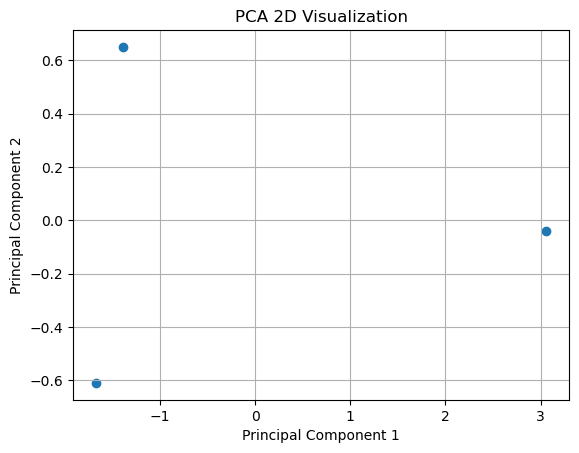

In [235]:
#pca_man=PCA(n_components=2)
pca_2d_man=pca_2d.fit_transform(copied_df)

plt.scatter(pca_2d_man[:, 0], pca_2d_man[:, 1])
plt.title('PCA 2D Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [237]:
# Create a DataFrame from the PCA components (loadings)
components_df = pd.DataFrame(pca_2d.components_, columns=copied_df.columns)

# Set a threshold for "importance" (e.g., top 5 features with the highest absolute loadings)
top_n = 11

# Identify the most important features for each principal component
for i in range(components_df.shape[0]):  # Iterate over each principal component
    print(f"\nTop {top_n} features for Principal Component {i+1}:")
    
    # Get the absolute values of the loadings for this component
    component_loadings = components_df.iloc[i].abs()
    
    # Sort the features by absolute loadings and select the top N
    top_features = component_loadings.sort_values(ascending=False).head(top_n)
    
    # Display the most important features
    print(top_features)


Top 11 features for Principal Component 1:
Max GR              0.217125
Min GR              0.216724
Mean Hue            0.216594
Gabor Feature 15    0.216400
Gabor Feature 16    0.216229
Max CAI             0.216217
Gabor Feature 13    0.216113
Gabor Feature 14    0.215433
Mean CAI            0.213060
Min CAI             0.213055
Gabor Feature 7     0.211241
Name: 0, dtype: float64

Top 11 features for Principal Component 2:
Species              0.794161
Fractal Dimension    0.528556
Gabor Feature 2      0.124860
Gabor Feature 6      0.114800
Mean EXG             0.089748
Entropy              0.089705
Gabor Feature 7      0.087967
Min CAI              0.076268
Mean CAI             0.076236
Gabor Feature 4      0.061876
Gabor Feature 10     0.055639
Name: 1, dtype: float64


## Box-Counting Fractal - PCA Plot

In [6]:
top_features = {
    'Fractal Dimension': 0.209309,
    'Gabor Feature 3': 0.209309,
    'Mean GR': 0.209309,
    'Max GR': 0.209309,
    'Min GR': 0.208236,
    'Mean Hue': 0.207887,
    'Gabor Feature 15': 0.207371,
    'Gabor Feature 16': 0.206920,
    'Max CAI': 0.206888,
    'Gabor Feature 13': 0.206613,
    'Gabor Feature 14': 0.204837
}

In [7]:
pca=pd.DataFrame(list(top_features.items()), columns=['Feature', 'Value'])

#pca.columns=['Weights']
pca.head(11)

Feature     Value
0   Fractal Dimension  0.209309
1     Gabor Feature 3  0.209309
2             Mean GR  0.209309
3              Max GR  0.209309
4              Min GR  0.208236
5            Mean Hue  0.207887
6    Gabor Feature 15  0.207371
7    Gabor Feature 16  0.206920
8             Max CAI  0.206888
9    Gabor Feature 13  0.206613
10   Gabor Feature 14  0.204837

In [8]:
pca_df=pca.T

pca_df

0                1         2         3         4   \
Feature  Fractal Dimension  Gabor Feature 3   Mean GR    Max GR    Min GR   
Value             0.209309         0.209309  0.209309  0.209309  0.208236   

               5                 6                 7         8   \
Feature  Mean Hue  Gabor Feature 15  Gabor Feature 16   Max CAI   
Value    0.207887          0.207371           0.20692  0.206888   

                       9                 10  
Feature  Gabor Feature 13  Gabor Feature 14  
Value            0.206613          0.204837

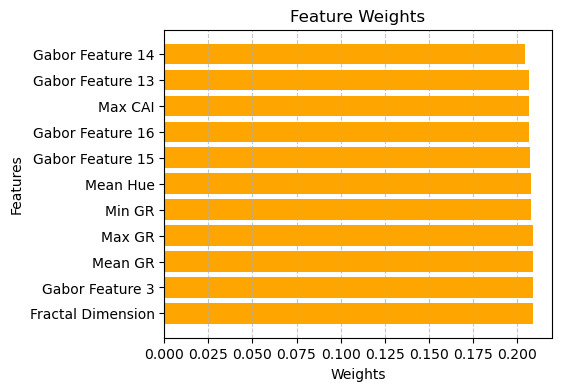

In [246]:
plt.figure(figsize=(5,4))
plt.barh(pca_df.loc['Feature'], pca_df.loc['Value'],color='orange')
plt.xlabel('Weights')
plt.ylabel('Features')
plt.title('Feature Weights')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

## Plots

In [247]:
total_dataset['Species']=le.fit_transform(total_dataset['Species'])

total_dataset['Species'].unique()

array([1, 0, 2], dtype=int64)

In [248]:
scaled_total = mm.fit_transform(total_dataset.drop('Species', axis=1))

In [249]:
pca_plot=PCA(n_components=2)
pca_plot.fit(scaled_total)

x_pca=pca_plot.transform(scaled_total)

In [250]:
x_pca.shape

(240, 2)

In [251]:
scaled_total.shape

(240, 28)

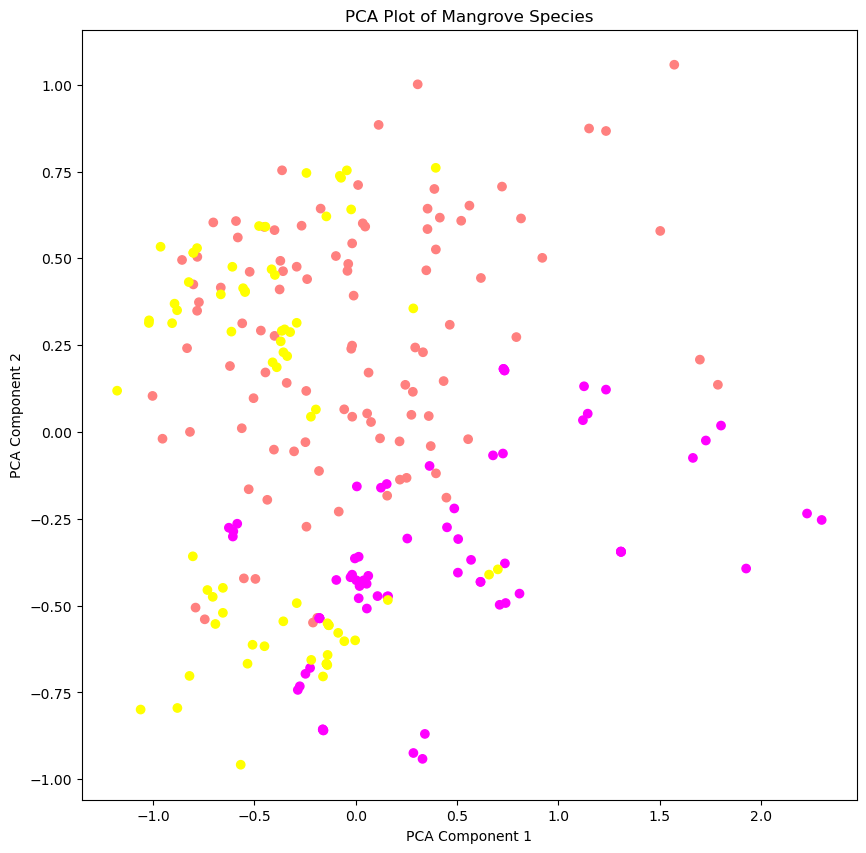

In [252]:
plt.figure(figsize=(10, 10))
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=total_dataset['Species'], cmap='spring')
plt.title('PCA Plot of Mangrove Species')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

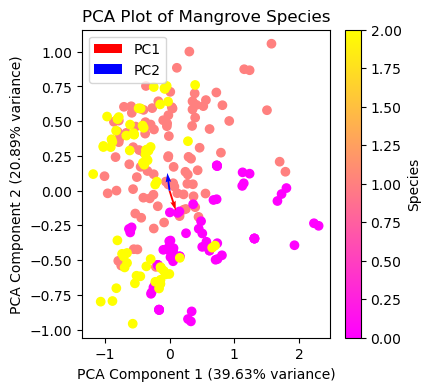

In [253]:
explained_variance = pca_plot.explained_variance_ratio_

pc1_vector = pca_plot.components_[0]
pc2_vector = pca_plot.components_[1]

plt.figure(figsize=(4, 4))
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=total_dataset['Species'], cmap='spring')

# Adding color bar and labels
plt.colorbar(scatter, label='Species')
plt.title('PCA Plot of Mangrove Species')
plt.xlabel(f'PCA Component 1 ({explained_variance[0]*100:.2f}% variance)')
plt.ylabel(f'PCA Component 2 ({explained_variance[1]*100:.2f}% variance)')

origin = np.mean(x_pca, axis=0)  # Start from the mean of the points
plt.quiver(origin[0], origin[1], pc1_vector[0], pc1_vector[1], angles='xy', scale_units='xy', scale=1, color='red', label='PC1')
plt.quiver(origin[0], origin[1], pc2_vector[0], pc2_vector[1], angles='xy', scale_units='xy', scale=1, color='blue', label='PC2')

plt.legend(loc='upper left')

plt.show()

## Rules

In [22]:
copied=final_dataset.copy()

In [286]:
from sklearn.model_selection import train_test_split

copied['Species']=le.fit_transform(copied['Species'])
X=copied.drop('Health Cluster',axis=1)
y=copied['Health Cluster']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [287]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(criterion='entropy',random_state=42)

In [288]:
X_train['Species'].unique()

array([0, 1, 2], dtype=int64)

In [289]:
dtc.fit(X_train,y_train)

y_pred=dtc.predict(X_test)

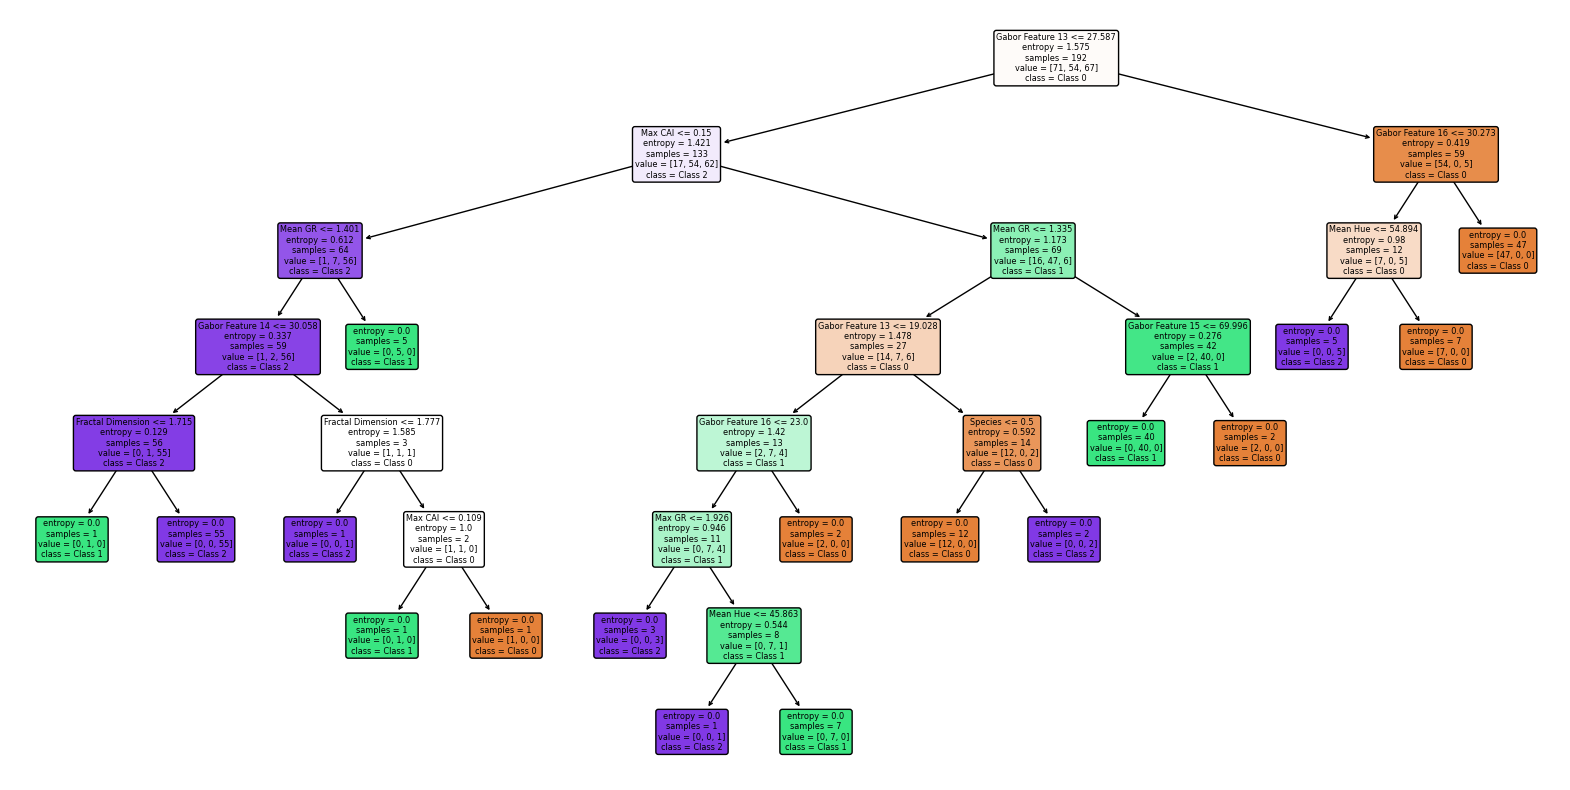

In [290]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=X_train.columns, class_names=['Class 0', 'Class 1','Class 2'], rounded=True)
plt.show()

In [ ]:
final_dataset['Gabor Feature 13']<=27.59

In [291]:
from sklearn.tree import export_text

# Get the textual representation of the tree
tree_rules = export_text(dtc, feature_names=list(X_train.columns))
print(tree_rules)


|--- Gabor Feature 13 <= 27.59
|   |--- Max CAI <= 0.15
|   |   |--- Mean GR <= 1.40
|   |   |   |--- Gabor Feature 14 <= 30.06
|   |   |   |   |--- Fractal Dimension <= 1.71
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Fractal Dimension >  1.71
|   |   |   |   |   |--- class: 2
|   |   |   |--- Gabor Feature 14 >  30.06
|   |   |   |   |--- Fractal Dimension <= 1.78
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Fractal Dimension >  1.78
|   |   |   |   |   |--- Max CAI <= 0.11
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Max CAI >  0.11
|   |   |   |   |   |   |--- class: 0
|   |   |--- Mean GR >  1.40
|   |   |   |--- class: 1
|   |--- Max CAI >  0.15
|   |   |--- Mean GR <= 1.34
|   |   |   |--- Gabor Feature 13 <= 19.03
|   |   |   |   |--- Gabor Feature 16 <= 23.00
|   |   |   |   |   |--- Max GR <= 1.93
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- Max GR >  1.93
|   |   |   |   |   |   |--- Mean Hue <= 45.86
|   |   |   |   |

In [292]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.8541666666666666


In [293]:
print(dtc.feature_importances_)

[0.03303255 0.         0.1608898  0.02001313 0.         0.05324805
 0.03834921 0.06941055 0.23436309 0.33728503 0.02602438 0.02738421]


In [294]:
X_train.columns

Index(['Fractal Dimension', 'Gabor Feature 3', 'Mean GR', 'Max GR', 'Min GR',
       'Mean Hue', 'Gabor Feature 15', 'Gabor Feature 16', 'Max CAI',
       'Gabor Feature 13', 'Gabor Feature 14', 'Species'],
      dtype='object')

In [295]:
# Filtering rows that satisfy the conditions
condition_1 = final_dataset['Gabor Feature 13'] <= 27.59
condition_2 = final_dataset['Max CAI'] <= 0.15
condition_3 = final_dataset['Mean GR'] <= 1.40
condition_4 = final_dataset['Gabor Feature 14'] <=30.06
condition_5 = final_dataset['Fractal Dimension'] > 1.71

# Applying the conditions to filter the dataset
filtered_data = final_dataset[condition_1 & condition_2 & condition_3 & condition_4 & condition_5]

# Display the filtered data
print(filtered_data)


    Fractal Dimension  Gabor Feature 3   Mean GR    Max GR    Min GR  \
5            1.723749       224.181168  1.143403  1.947368  0.315385   
17           1.853589       175.913864  1.261564  1.938775  0.421569   
18           1.817201        87.117775  1.159422  1.842105  0.653846   
19           1.768879       178.353836  1.259253  2.256410  0.544118   
24           1.782472       155.528824  1.379857  2.354166  0.446043   
..                ...              ...       ...       ...       ...   
62           1.845868        34.023624  1.195752  1.962963  0.640000   
63           1.836083        33.565392  1.198676  1.962963  0.630573   
64           1.841714        72.098495  1.263274  1.899999  0.634409   
65           1.849020        86.096924  1.270381  2.473683  0.589041   
67           1.871613        68.433983  1.261082  1.964285  0.500000   

     Mean Hue  Gabor Feature 15  Gabor Feature 16   Max CAI  Gabor Feature 13  \
5   45.053382         24.829273         16.964285  0.1

## Fuzzy Clustering

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage import feature
from skimage import measure
from PIL import Image
import matplotlib.pyplot as plt

#final_dataset=pd.read_csv('final_mangroove_data.csv')

In [9]:
final_dataset_columns=pca_df.loc['Feature']

final_dataset = total_dataset[final_dataset_columns]

In [272]:
total_dataset.head()

Entropy  Fractal Dimension  Gabor Feature 1  Gabor Feature 2  \
0  7.232475           1.793365        36.403687        57.873650   
1  7.318153           1.732256        57.282681       129.475128   
2  7.291966           1.808949        96.416046       223.412079   
3  7.306464           1.742554        58.256100       127.800354   
4  7.345132           1.726070        66.140549       157.314117   

   Gabor Feature 3  Gabor Feature 4  Gabor Feature 5  Gabor Feature 6  \
0        73.741005        49.422955       106.885391       156.246857   
1       154.868103        77.068062       167.535492       349.139618   
2       327.402557       188.509705       279.264862       596.934204   
3       152.734299        77.612167       170.360550       344.674500   
4       227.229660       127.841400       192.059433       418.736084   

   Gabor Feature 7  Gabor Feature 8  ...    Min GR    Max GR    Mean EXG  \
0       214.331024       133.883942  ...  0.629629  1.838709   36.316698   
1       449.532532       206.192612  ...  0.363636  1.729729  120.518040   
2       952.694824       503.009064  ...  0.437500  2.349999  116.117510   
3       443.454956       207.788696  ...  0.376623  1.794117  122.550294   
4       658.506165       341.078003  ...  0.311594  1.851852   60.196937   

   Min EXG  Max EXG   Mean Hue  Mean CAI   Min CAI   Max CAI  Species  
0      0.0    255.0  54.737317 -0.063421 -0.636364  0.066667        1  
1      0.0    255.0  68.298833 -0.080272 -0.680851  0.090909        1  
2      0.0    255.0  61.285730 -0.076778 -0.818182  0.170213        1  
3      0.0    255.0  67.213883 -0.082809 -0.688889  0.128205        1  
4      0.0    255.0  46.012830 -0.099300 -0.682540  0.200000        1  

[5 rows x 29 columns]

In [16]:
total_dataset['Species'].value_counts()

Species
Rhizophora    100
Avicenna       70
Sonneratia     70
Name: count, dtype: int64

In [17]:
species_labels = ['Rhizophora'] * 100 + ['Avicenna'] * 70 + ['Sonnertia'] * 70

# Add the Species column to the DataFrame
final_dataset['Species'] = species_labels

In [2]:
final_dataset.head(10)

Fractal Dimension  Gabor Feature 3   Mean GR    Max GR    Min GR  \
0           1.793365        73.741005  1.122009  1.838709  0.629629   
1           1.732256       154.868100  1.031461  1.729729  0.363636   
2           1.808949       327.402560  1.497304  2.349999  0.437500   
3           1.742554       152.734300  1.022958  1.794117  0.376623   
4           1.726070       227.229660  1.138947  1.851852  0.311594   
5           1.723749       224.181170  1.143403  1.947368  0.315385   
6           1.690791       125.123630  1.113206  1.862068  0.500000   
7           1.815412       156.784650  1.149259  1.999999  0.362637   
8           1.804659       156.059810  1.140795  1.911764  0.340909   
9           1.752754       149.756420  1.157760  1.682926  0.385417   

    Mean Hue  Gabor Feature 15  Gabor Feature 16   Max CAI  Gabor Feature 13  \
0  54.737317         26.838526         28.938880  0.066667         36.525635   
1  68.298833         25.221203         19.200066  0.090909         26.348915   
2  61.285730         44.770485         19.380325  0.170213         10.839167   
3  67.213883         30.127090         23.251104  0.128205         30.829412   
4  46.012830         22.697569         15.660233  0.200000         11.506169   
5  45.053382         24.829273         16.964285  0.142857         11.148009   
6  52.886594         17.440166         16.799646  0.172414         18.018003   
7  52.842688         21.974125         23.352785  0.179487         20.501991   
8  52.167934         23.904951         30.162127  0.100000         29.919844   
9  52.417637         32.569866         20.379602  0.111111         20.121185   

   Gabor Feature 14  Species  Health Cluster  
0         29.314835        1               2  
1         30.980423        1               2  
2         21.612694        1               1  
3         34.695800        1               0  
4         16.316944        1               2  
5         14.683663        1               2  
6         17.717398        1               2  
7         26.026299        1               2  
8         32.318390        1               2  
9         30.137995        1               2

In [19]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
final_dataset['Species']=le.fit_transform(final_dataset['Species'])

In [5]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
scaled_final_dataset=sc.fit_transform(final_dataset)

In [6]:
import skfuzzy as fuzz

health_clusters = 3
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    scaled_final_dataset.T, health_clusters, 2, error=0.005, maxiter=1000, init=None
)
cluster_labels = np.argmax(u, axis=0)

In [7]:
final_dataset['Health Cluster'] = cluster_labels

In [4]:
final_dataset=final_dataset.drop('Health Cluster',axis=1)

In [281]:
final_dataset['Health Cluster'].value_counts()

Health Cluster
2    92
0    83
1    65
Name: count, dtype: int64

2 - medium
0 - bad
1 - good

In [283]:
final_dataset.head(10)

Fractal Dimension  Gabor Feature 3   Mean GR    Max GR    Min GR  \
0           1.793365        73.741005  1.122009  1.838709  0.629629   
1           1.732256       154.868103  1.031461  1.729729  0.363636   
2           1.808949       327.402557  1.497304  2.349999  0.437500   
3           1.742554       152.734299  1.022958  1.794117  0.376623   
4           1.726070       227.229660  1.138947  1.851852  0.311594   
5           1.723749       224.181168  1.143403  1.947368  0.315385   
6           1.690791       125.123627  1.113206  1.862068  0.500000   
7           1.815412       156.784653  1.149259  1.999999  0.362637   
8           1.804659       156.059814  1.140795  1.911764  0.340909   
9           1.752754       149.756424  1.157760  1.682926  0.385417   

    Mean Hue  Gabor Feature 15  Gabor Feature 16   Max CAI  Gabor Feature 13  \
0  54.737317         26.838526         28.938881  0.066667         36.525635   
1  68.298833         25.221203         19.200066  0.090909         26.348915   
2  61.285730         44.770485         19.380325  0.170213         10.839167   
3  67.213883         30.127090         23.251104  0.128205         30.829412   
4  46.012830         22.697569         15.660233  0.200000         11.506169   
5  45.053382         24.829273         16.964285  0.142857         11.148009   
6  52.886594         17.440166         16.799646  0.172414         18.018003   
7  52.842688         21.974125         23.352785  0.179487         20.501991   
8  52.167934         23.904951         30.162127  0.100000         29.919844   
9  52.417637         32.569866         20.379602  0.111111         20.121185   

   Gabor Feature 14  Species  Health Cluster  
0         29.314835        1               2  
1         30.980423        1               2  
2         21.612694        1               1  
3         34.695801        1               0  
4         16.316944        1               2  
5         14.683663        1               2  
6         17.717398        1               2  
7         26.026299        1               2  
8         32.318390        1               2  
9         30.137995        1               2

In [284]:
final_dataset.to_csv("final_mangroove_data.csv", index=False)

## Health Cluster Plots

<Figure size 1000x700 with 0 Axes>

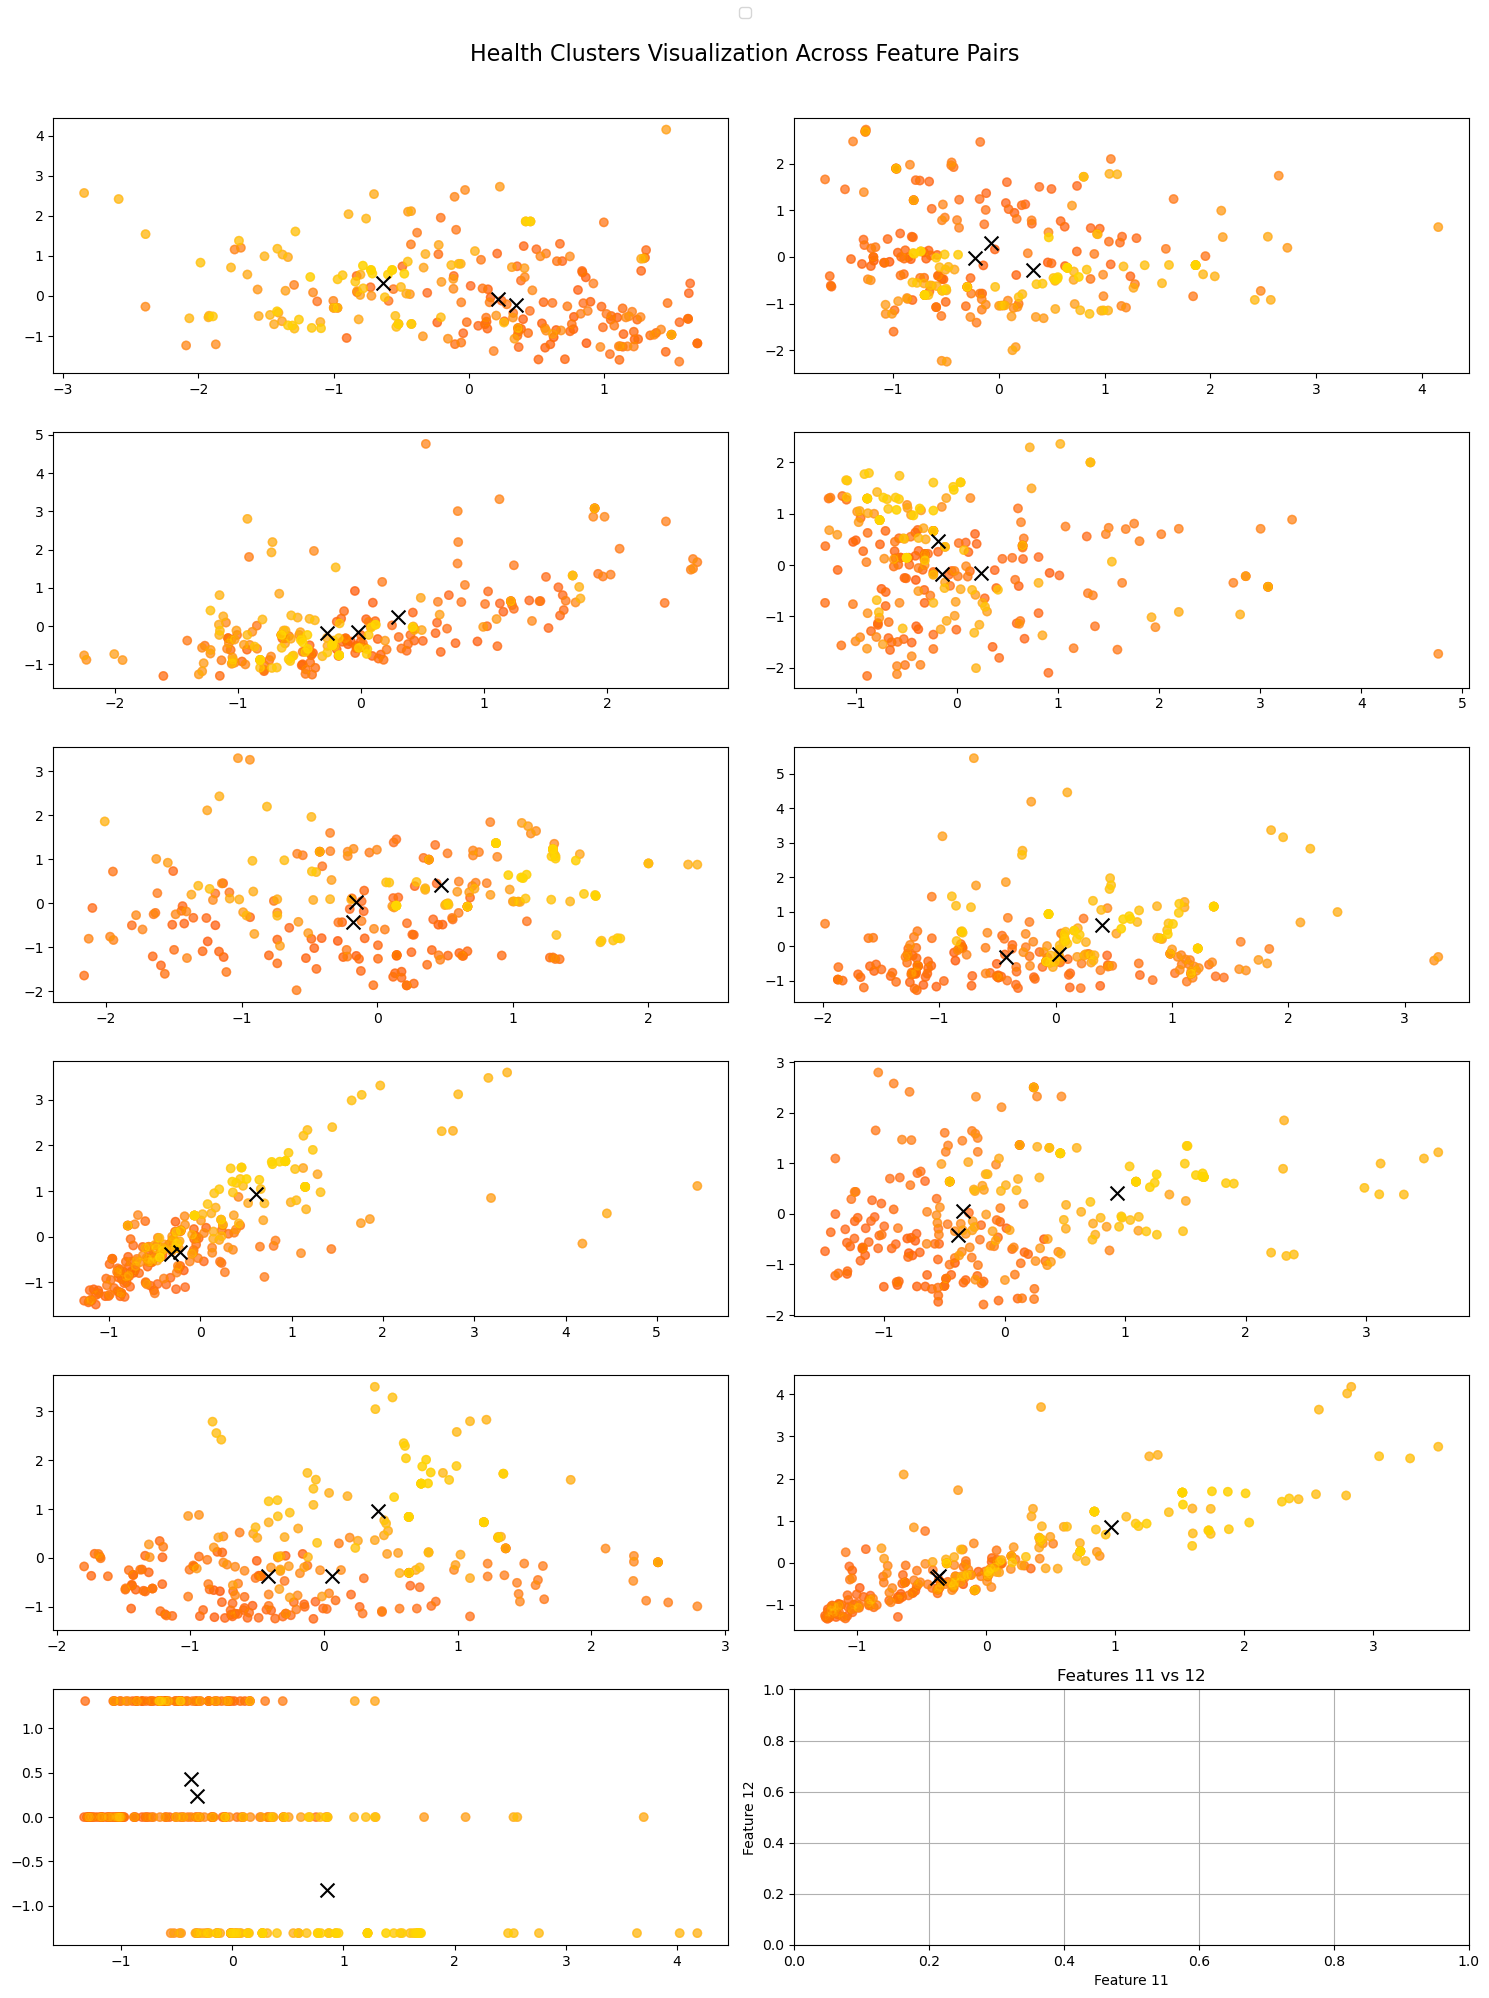

In [14]:
plt.figure(figsize=(10, 7))

n_features = 12
health_clusters = 3
colors = ['#FF6347', '#FF4500', '#FFD700']


fig, axes = plt.subplots(n_features // 2, 2, figsize=(15, 20))  # 6 rows, 2 columns for 12 features
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < n_features - 1:  # Ensure not to exceed the number of features
        feature_x = i  # X-axis feature
        feature_y = i + 1  # Y-axis feature

        # Plot for each cluster
        for j in range(health_clusters):
            membership = u[j, :]  # Membership values for the cluster
            ax.scatter(
                scaled_final_dataset.T[feature_x],  # X-axis feature
                scaled_final_dataset.T[feature_y],  # Y-axis feature
                c=colors[j % len(colors)],
                alpha=membership,
                label=f"Cluster {j + 1}" if i == 0 else ""  # Only add legend once
            )

        # Plot cluster centers
        ax.scatter(
            cntr[:, feature_x],  # X-coordinates of cluster centers
            cntr[:, feature_y],  # Y-coordinates of cluster centers
            c='black',
            marker='x',
            s=100,
            label='Cluster Centers' if i == 0 else ""
        )

        # Set subplot labels and titles
ax.set_xlabel(f'Feature {feature_x + 1}')
ax.set_ylabel(f'Feature {feature_y + 1}')
ax.set_title(f'Features {feature_x + 1} vs {feature_y + 1}')
ax.grid()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=health_clusters + 1, fontsize=10)
fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle("Health Clusters Visualization Across Feature Pairs", fontsize=16)

# Show plot
plt.show()


In [ ]:
copied=final_dataset.copy()

copied

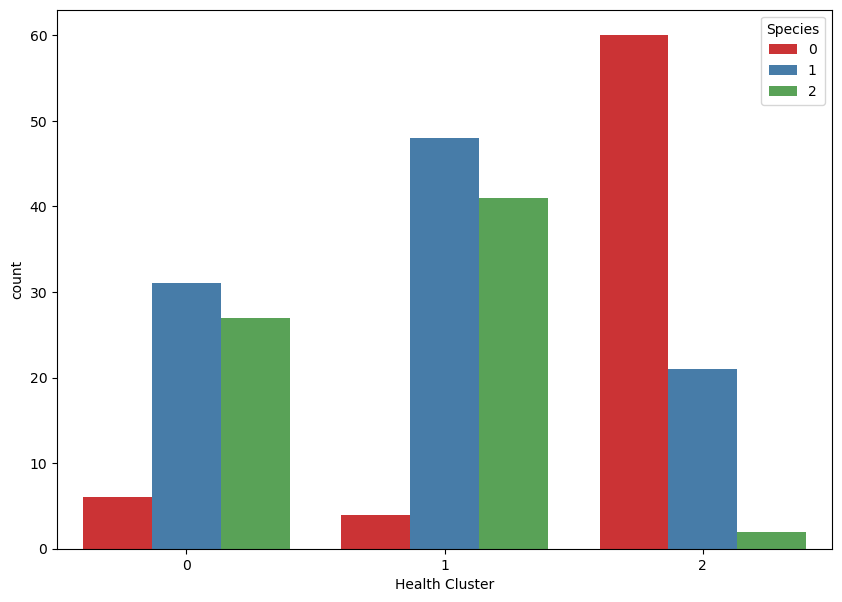

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

# Plot the distribution of each species across health clusters
sns.countplot(data=final_dataset, x='Health Cluster', hue='Species', palette='Set1')

# Show the legend
plt.legend(title='Species', loc='upper right')

# Show the plot
plt.show()

## membership values of each feature

In [323]:
neu_data=membership_df.T #health cluster
neu_data

0         1         2         3         4         5    \
Cluster 1  0.327699  0.329672  0.261327  0.377460  0.236717  0.230591   
Cluster 2  0.291310  0.324456  0.411715  0.304902  0.370381  0.368576   
Cluster 3  0.380992  0.345873  0.326958  0.317638  0.392902  0.400833   

                6         7         8         9    ...       230       231  \
Cluster 1  0.262174  0.167714  0.266605  0.259590  ...  0.118898  0.126768   
Cluster 2  0.354959  0.383964  0.332149  0.337302  ...  0.328444  0.329706   
Cluster 3  0.382868  0.448322  0.401246  0.403108  ...  0.552658  0.543526   

                232       233       234       235       236       237  \
Cluster 1  0.125095  0.124554  0.082975  0.087398  0.207142  0.117979   
Cluster 2  0.328758  0.328834  0.311284  0.367475  0.445051  0.333170   
Cluster 3  0.546146  0.546612  0.605741  0.545127  0.347807  0.548851   

                238       239  
Cluster 1  0.251703  0.200256  
Cluster 2  0.422851  0.475362  
Cluster 3  0.325446  0.324382  

[3 rows x 240 columns]

## Anfis

In [3]:
data=final_dataset.copy()

In [32]:
def gaussian_mf(x,mean,sigma):
    return np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

In [33]:
def initial_membership_params(num_features,num_mfs=3):
    mean = np.random.uniform(0, 1, (num_features, num_mfs))  # Random means
    sigma = np.random.uniform(0.1, 0.5, (num_features, num_mfs))  # Random widths
    return mean, sigma

In [34]:
def fuzzify(X,mean,sigma):
    n_samples,n_features=X.shape
    num_mfs=mean.shape[1]
    fuzzified = np.zeros((n_samples, n_features * num_mfs))

    for i in range(n_features):
        for j in range(num_mfs):
            fuzzified[:, i * num_mfs + j] = gaussian_mf(X[:, i], means[i, j], sigmas[i, j])

    return fuzzified

In [35]:
def rule_evaluation(fuzzified_values, num_features, num_mfs):
    n_samples = fuzzified_values.shape[0]
    num_rules = num_mfs ** num_features  
    rule_strengths=np.zeros((n_samples,num_rules))

    from itertools import product
    mf_combinations = list(product(range(num_mfs), repeat=num_features))

    for sample_idx in range(n_samples):
        for rule_idx, combination in enumerate(mf_combinations):
            strength = 1
            for feature_idx, mf_idx in enumerate(combination):
                strength *= fuzzified_values[sample_idx, feature_idx * num_mfs + mf_idx]
            rule_strengths[sample_idx, rule_idx] = strength
    
    return rule_strengths

In [36]:
def normal_rule_strength(rule_strengths):
    normalized_strength=rule_strengths/np.sum(rule_strengths,axis=1,keepdims=True)
    return normalized_strength

In [39]:
def weighted_outputs(normalized_strengths,X,consequent_params):
    n_samples, n_features = X.shape
    num_rules = normalized_strengths.shape[1]
    rule_outputs = np.zeros((n_samples, num_rules))
    for rule_idx in range(num_rules):
        rule_outputs[:, rule_idx] = np.dot(X, consequent_params[rule_idx, :-1]) + consequent_params[rule_idx, -1]
    final_output = np.sum(normalized_strengths * rule_outputs, axis=1)
    return final_output

In [375]:
# from sklearn.metrics import mean_squared_error

# def train_anfis(X, y, mean, sigma, consequent_params, epochs=10, learning_rate=0.01):
#     n_samples, n_features = X.shape
#     num_mfs = means.shape[1]
#     mse_history = []

#     for epochs in range(epochs):
#         fuzzified_output=fuzzify(X,mean,sigma)
#         rule_strengths=rule_evaluation(fuzzified_output, n_features, num_mfs)
#         normalized_strength=normal_rule_strength(rule_strengths)
#         predictions=weighted_outputs(normalized_strength,X,consequent_params)

#         error=y-predictions
#         mse=mean_squared_error(y,predictions)
#         mse_history.append(mse)

#         #back propagation
#         for i in range(n_features):
#             for j in range(num_mfs):
#                 grad_mean = np.sum(error * normalized_strengths * (X[:, i] - means[i, j]) / (sigmas[i, j] ** 2))
#                 grad_sigma = np.sum(error * normalized_strengths * ((X[:, i] - means[i, j]) ** 2) / (sigmas[i, j] ** 3))
#                 means[i, j] -= learning_rate * grad_mean
#                 sigmas[i, j] -= learning_rate * grad_sigma

#         for rule_idx in range(num_rules):
#             A = np.hstack([X, np.ones((n_samples, 1))])  # Add bias term
#             b = y * normalized_strengths[:, rule_idx]
#             consequent_params[rule_idx] = np.linalg.lstsq(A, b, rcond=None)[0]

#         print(f"Epoch {epoch + 1}/{epochs}, MSE: {mse}")

#         return means, sigmas, consequent_params, mse_history


In [349]:
X_norm.shape

(240, 12)

In [355]:
# num_features = X_norm.shape[1]  
# means, sigmas =  initial_membership_params(num_features)

In [360]:
# means.shape

(12, 3)

In [365]:
# fuzzified_values = fuzzify(X_norm, means, sigmas)

In [366]:
# num_mfs = means.shape[1]  # Number of MFs per feature
# rule_strengths = rule_evaluation(fuzzified_values, num_features, num_mfs)

In [371]:
# normalized_strengths = normal_rule_strength(rule_strengths)

In [379]:
# num_rules = normalized_strengths.shape[0]
# consequent_params = np.random.uniform(-1, 1, (num_rules, num_features + 1))

In [378]:
normalized_strengths.shape

(240, 531441)

In [61]:
# trained_means, trained_sigmas, trained_consequents, mse_history = train_anfis(
#     X_norm, y, means, sigmas, consequent_params, epochs=20, learning_rate=0.01
# )

In [45]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from itertools import product

# Gaussian Membership Function
def gaussian_mf(x, mean, sigma):
    return np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

# Initialize Membership Parameters
def initial_membership_params(num_features, num_mfs=2):
    mean = np.random.uniform(0, 1, (num_features, num_mfs))  # Random means
    sigma = np.random.uniform(0.1, 0.5, (num_features, num_mfs))  # Random widths
    #mean = tf.Variable(tf.random.uniform((num_features, num_mfs), 0, 1), dtype=tf.float32)
#sigma = tf.Variable(tf.random.uniform((num_features, num_mfs), 0.1, 0.5), dtype=tf.float32)

    return mean, sigma

# Fuzzify Inputs
def fuzzify_tf(X, mean, sigma):
    n_samples, n_features = X.shape
    num_mfs = mean.shape[1]

    # Expand dimensions for broadcasting
    X_expanded = tf.expand_dims(X, axis=2)  # Shape: (n_samples, n_features, 1)
    mean_expanded = tf.expand_dims(mean, axis=0)  # Shape: (1, n_features, num_mfs)
    sigma_expanded = tf.expand_dims(sigma, axis=0)  # Shape: (1, n_features, num_mfs)

    # Compute Gaussian membership values
    gaussian_mfs = tf.exp(-((X_expanded - mean_expanded) ** 2) / (2 * sigma_expanded ** 2))

    fuzzified = tf.reshape(gaussian_mfs, (n_samples, n_features * num_mfs))

    return fuzzified

def rule_evaluation_tf(fuzzified_values, num_features, num_mfs):
    mf_combinations = tf.stack(
        tf.meshgrid(*[tf.range(num_mfs) for _ in range(num_features)], indexing='ij'),
        axis=-1
    )
    mf_combinations = tf.reshape(mf_combinations, (-1, num_features))

    rule_strengths = tf.reduce_prod(
        tf.gather(fuzzified_values, mf_combinations, axis=1),
        axis=-1
    )
    return rule_strengths


# Normalize Rule Strengths
# def normal_rule_strength(rule_strengths):
#     return rule_strengths / (np.sum(rule_strengths, axis=1, keepdims=True) + 1e-8)

# Compute Weighted Outputs
def weighted_outputs_tf(normalized_strength, X, consequent_params):
    n_samples, n_features = X.shape
    num_rules = normalized_strength.shape[1]

    # Separate weights and biases from consequent parameters
    weights = consequent_params[:, :-1]  # Shape: (num_rules, n_features)
    biases = consequent_params[:, -1]   # Shape: (num_rules,)

    # Compute rule outputs: X * weights + biases
    rule_outputs = tf.matmul(X, tf.transpose(weights)) + biases
    final_output = tf.reduce_sum(normalized_strength * rule_outputs, axis=1) 
    return final_output


In [46]:
def train_anfis(X, y, mean, sigma, consequent_params, epochs=10, learning_rate=0.01):
    num_features = X.shape[1]
    num_mfs = mean.shape[1]

    # Convert inputs to TensorFlow tensors
    X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)
    y_tensor = tf.convert_to_tensor(y, dtype=tf.float32)

    # Convert membership and consequent parameters to trainable variables
    mean_var = tf.Variable(mean, dtype=tf.float32, trainable=True)
    sigma_var = tf.Variable(sigma, dtype=tf.float32, trainable=True)
    consequent_var = tf.Variable(consequent_params, dtype=tf.float32, trainable=True)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    mse_history = []

    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            # Fuzzify inputs
            fuzzified_output = fuzzify_tf(X_tensor, mean_var, sigma_var)

            # Compute rule strengths
            rule_strengths = rule_evaluation_tf(fuzzified_output, num_features, num_mfs)

            # Normalize rule strengths
            normalized_strength = tf.nn.softmax(rule_strengths, axis=1)

            # Compute predictions
            predictions = weighted_outputs_tf(normalized_strength, X_tensor, consequent_var)

            # Compute MSE loss
            loss = tf.reduce_mean(tf.square(y_tensor - predictions))

        # Compute and apply gradients
        gradients = tape.gradient(loss, [mean_var, sigma_var, consequent_var])
        optimizer.apply_gradients(zip(gradients, [mean_var, sigma_var, consequent_var]))

        mse_history.append(loss.numpy())
        print(f"Epoch {epoch + 1}/{epochs}, MSE: {loss.numpy():.4f}")

    return mean_var.numpy(), sigma_var.numpy(), consequent_var.numpy(), mse_history


In [47]:
num_features = X_norm.shape[1]  # Number of features
num_mfs = 3  # Number of MFs per feature (you can choose this)

# Initialize membership parameters
means, sigmas = initial_membership_params(num_features, num_mfs)

In [10]:
num_rules = num_mfs ** num_features  # Total number of rules
consequent_params = np.random.uniform(-1, 1, (num_rules, num_features + 1))

In [2]:
type_A = final_dataset.iloc[:100]
type_B = final_dataset.iloc[100:170]
type_C = final_dataset.iloc[170:]

import random

sample_A = type_A.sample(n=2, random_state=42)
sample_B = type_B.sample(n=2, random_state=42)
sample_C = type_C.sample(n=2, random_state=42)

smaller_dataset = pd.concat([sample_A, sample_B, sample_C])

In [3]:
X=smaller_dataset.iloc[:,:-1].values
y=smaller_dataset.iloc[:,-1].values

In [4]:
import tensorflow as tf

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
from sklearn.preprocessing import MinMaxScaler

mm=MinMaxScaler()
X_norm=mm.fit_transform(X_train)

In [20]:
# Training the ANFIS model
epochs = 5  # Number of training epochs
learning_rate = 0.01  # Learning rate for parameter updates

trained_means, trained_sigmas, trained_consequents, mse_history = train_anfis(
    X_norm, y_train, means, sigmas, consequent_params, epochs, learning_rate
)

Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().
Epoch 1/5, MSE: 2.0001
Epoch 2/5, MSE: 1.9625
Epoch 3/5, MSE: 1.9193
Epoch 4/5, MSE: 1.8736
Epoch 5/5, MSE: 1.8269


In [48]:
# Fuzzify the test inputs
fuzzified_test = fuzzify_tf(X_test, trained_means, trained_sigmas)

# Evaluate the rules for the test set
rule_strengths_test = rule_evaluation_tf(fuzzified_test, num_features, num_mfs)

# Normalize rule strengths
normalized_strengths_test = tf.nn.softmax(rule_strengths, axis=1)

# Compute the final output for the test set
predictions_test = weighted_outputs_tf(normalized_strengths_test, X_test, trained_consequents)


InvalidArgumentError: cannot compute Sub as input #1(zero-based) was expected to be a double tensor but is a float tensor [Op:Sub]

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

mse_test = mean_squared_error(y_test, predictions_test)
r2_test = r2_score(y_test, predictions_test)

print(f"Test MSE: {mse_test:.4f}")
print(f"Test R2 Score: {r2_test:.4f}")


ValueError: Input contains NaN.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse_test = mean_squared_error(y_test, predictions_test)
r2_test = r2_score(y_test, predictions_test)

print(f"Test MSE: {mse_test:.4f}")
print(f"Test R2 Score: {r2_test:.4f}")


## Again

In [44]:
type_A = final_dataset.iloc[:100]
type_B = final_dataset.iloc[100:170]
type_C = final_dataset.iloc[170:]

import random

sample_A = type_A.sample(n=10, random_state=42)
sample_B = type_B.sample(n=10, random_state=42)
sample_C = type_C.sample(n=10, random_state=42)

smaller_dataset = pd.concat([sample_A, sample_B, sample_C])

In [2]:
X=final_dataset.iloc[:,:-1].values
y=final_dataset.iloc[:,-1].values

In [4]:
from sklearn.preprocessing import MinMaxScaler

mm=MinMaxScaler()
X_norm=mm.fit_transform(X)

In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Kmeans

In [23]:
from sklearn.cluster import KMeans

# Fix the number of rules (e.g., 15)
num_rules = 15

# Perform K-means clustering to group the data into clusters
kmeans = KMeans(n_clusters=num_rules, random_state=42)
kmeans.fit(X)

# Extract cluster centers as fuzzy rule centers
centers = kmeans.cluster_centers_

C:\Users\TANISTHA\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TANISTHA\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
# Calculate sigmas (spread of each fuzzy set)
sigmas = np.zeros_like(centers)
for i in range(num_rules):
    cluster_points = X[kmeans.labels_ == i]
    if len(cluster_points) > 1:  # Avoid division by zero
        sigmas[i, :] = np.std(cluster_points, axis=0)
    else:
        sigmas[i, :] = 1e-3  # Small value for numerical stability

# Rule weights (uniform initialization)
rule_weights = np.ones(num_rules)

In [63]:
from sklearn.linear_model import LinearRegression

# Fit a linear regression model to the data
regressor = LinearRegression()
regressor.fit(X, y)

# Coefficients for each rule
coefficients = np.tile(regressor.coef_, (num_rules, 1))  # Same coefficients for all rules
bias = np.mean(y)  # Use the mean of the target as the initial bias term


In [9]:
def gaussian_membership(x, center, sigma):
    # Ensure sigma is not zero to avoid division by zero
    sigma = np.maximum(sigma, 1e-6)  # Replace zeros with a small value (1e-6)
    return np.exp(-np.square(x - center) / (2 * np.square(sigma)))

# Example: Calculate membership for the first instance
x_instance = X[0]  # Replace `X_data_normalized` with your dataset
memberships = []

for i in range(num_rules):
    membership = gaussian_membership(x_instance, centers[i], sigmas[i])
    memberships.append(membership)

memberships = np.array(memberships)  # Shape: (num_rules, num_features)

# Compute rule strengths
rule_strengths = np.prod(memberships, axis=1)  # Combine memberships across features

# Check for zero sum to avoid division by zero
if np.sum(rule_strengths) == 0:
    print("Warning: All rule strengths are zero. Check your membership functions.")
else:
    rule_strengths /= np.sum(rule_strengths)  # Normalize rule strengths

print(rule_strengths)

[0.00000000e+00 0.00000000e+00 8.88612443e-12 0.00000000e+00
 3.77438614e-28 5.77812171e-15 0.00000000e+00 0.00000000e+00
 9.99997905e-01 2.09526074e-06 0.00000000e+00 0.00000000e+00
 6.09039108e-29 2.41486530e-51 9.70708994e-33]


In [11]:
import tensorflow as tf

# Ensure centers and sigmas are tf.float32
centers = tf.convert_to_tensor(centers, dtype=tf.float32)
sigmas = tf.convert_to_tensor(sigmas, dtype=tf.float32)

# Input placeholders
inputs = tf.keras.Input(shape=(12,))  # 12 features

# Layer 1: Membership Functions
memberships = []
for i in range(num_rules):
    # Ensure that inputs, centers, and sigmas are of the same dtype
    membership = tf.exp(-tf.square(inputs - centers[i]) / (2 * tf.square(sigmas[i])))
    memberships.append(membership)

memberships = tf.stack(memberships, axis=1)  # Shape: (batch_size, num_rules, num_features)
rule_strengths = tf.reduce_prod(memberships, axis=2)  # Combine memberships across features
rule_strengths_normalized = rule_strengths / tf.reduce_sum(rule_strengths, axis=1, keepdims=True)

# Layer 2: Output Calculation
outputs = tf.reduce_sum(rule_strengths_normalized[:, :, None] * coefficients[None, :, :], axis=1)
final_output = tf.reduce_sum(outputs, axis=1) + bias  # Add bias term

# Define the model
anfis_model = tf.keras.Model(inputs=inputs, outputs=final_output)
anfis_model.summary()

NameError: name 'coefficients' is not defined

### Neural

In [67]:
import numpy as np

# Assuming X_norm is the normalized data
print("Mean of X_norm:", np.mean(X_norm, axis=0))
print("Variance of X_norm:", np.var(X_norm, axis=0))
print("Standard Deviation of X_norm:", np.std(X_norm, axis=0))

Mean of X_norm: [0.62737678 0.28318817 0.45123502 0.21466388 0.47791558 0.37584385
 0.18937951 0.29281068 0.39102837 0.26277617 0.24137495 0.5       ]
Variance of X_norm: [0.04863522 0.02979453 0.04027286 0.02720315 0.04883133 0.03598292
 0.02217839 0.03863072 0.04752331 0.04423265 0.03292785 0.14583333]
Standard Deviation of X_norm: [0.22053394 0.17261092 0.20068098 0.16493378 0.22097813 0.18969164
 0.14892412 0.19654698 0.21799841 0.21031559 0.18146033 0.38188131]


In [4]:
#fuzzify membership functions
import skfuzzy as fuzz

def fuzzify(data, n_memberships=3):
    fuzzified_data = []
    for feature in range(data.shape[1]):
        # Define membership functions (low, medium, high)
        min_val, max_val = np.min(data[:, feature]), np.max(data[:, feature])
        x = np.linspace(min_val, max_val, 100)
        mf_low = fuzz.trimf(x, [min_val, min_val, (min_val + max_val) / 2])
        mf_medium = fuzz.trimf(x, [min_val, (min_val + max_val) / 2, max_val])
        mf_high = fuzz.trimf(x, [(min_val + max_val) / 2, max_val, max_val])
        
                # Compute membership values
        feature_values = data[:, feature]
        fuzzified_feature = np.array([
            [fuzz.interp_membership(x, mf_low, v),
             fuzz.interp_membership(x, mf_medium, v),
             fuzz.interp_membership(x, mf_high, v)]
            for v in feature_values
        ])
        fuzzified_data.append(fuzzified_feature)

        fuzzified_data_combined = np.concatenate(fuzzified_data, axis=1)
    
    
    return fuzzified_data_combined

In [5]:
fuzzified_dataset=fuzzify(X[:,:11])

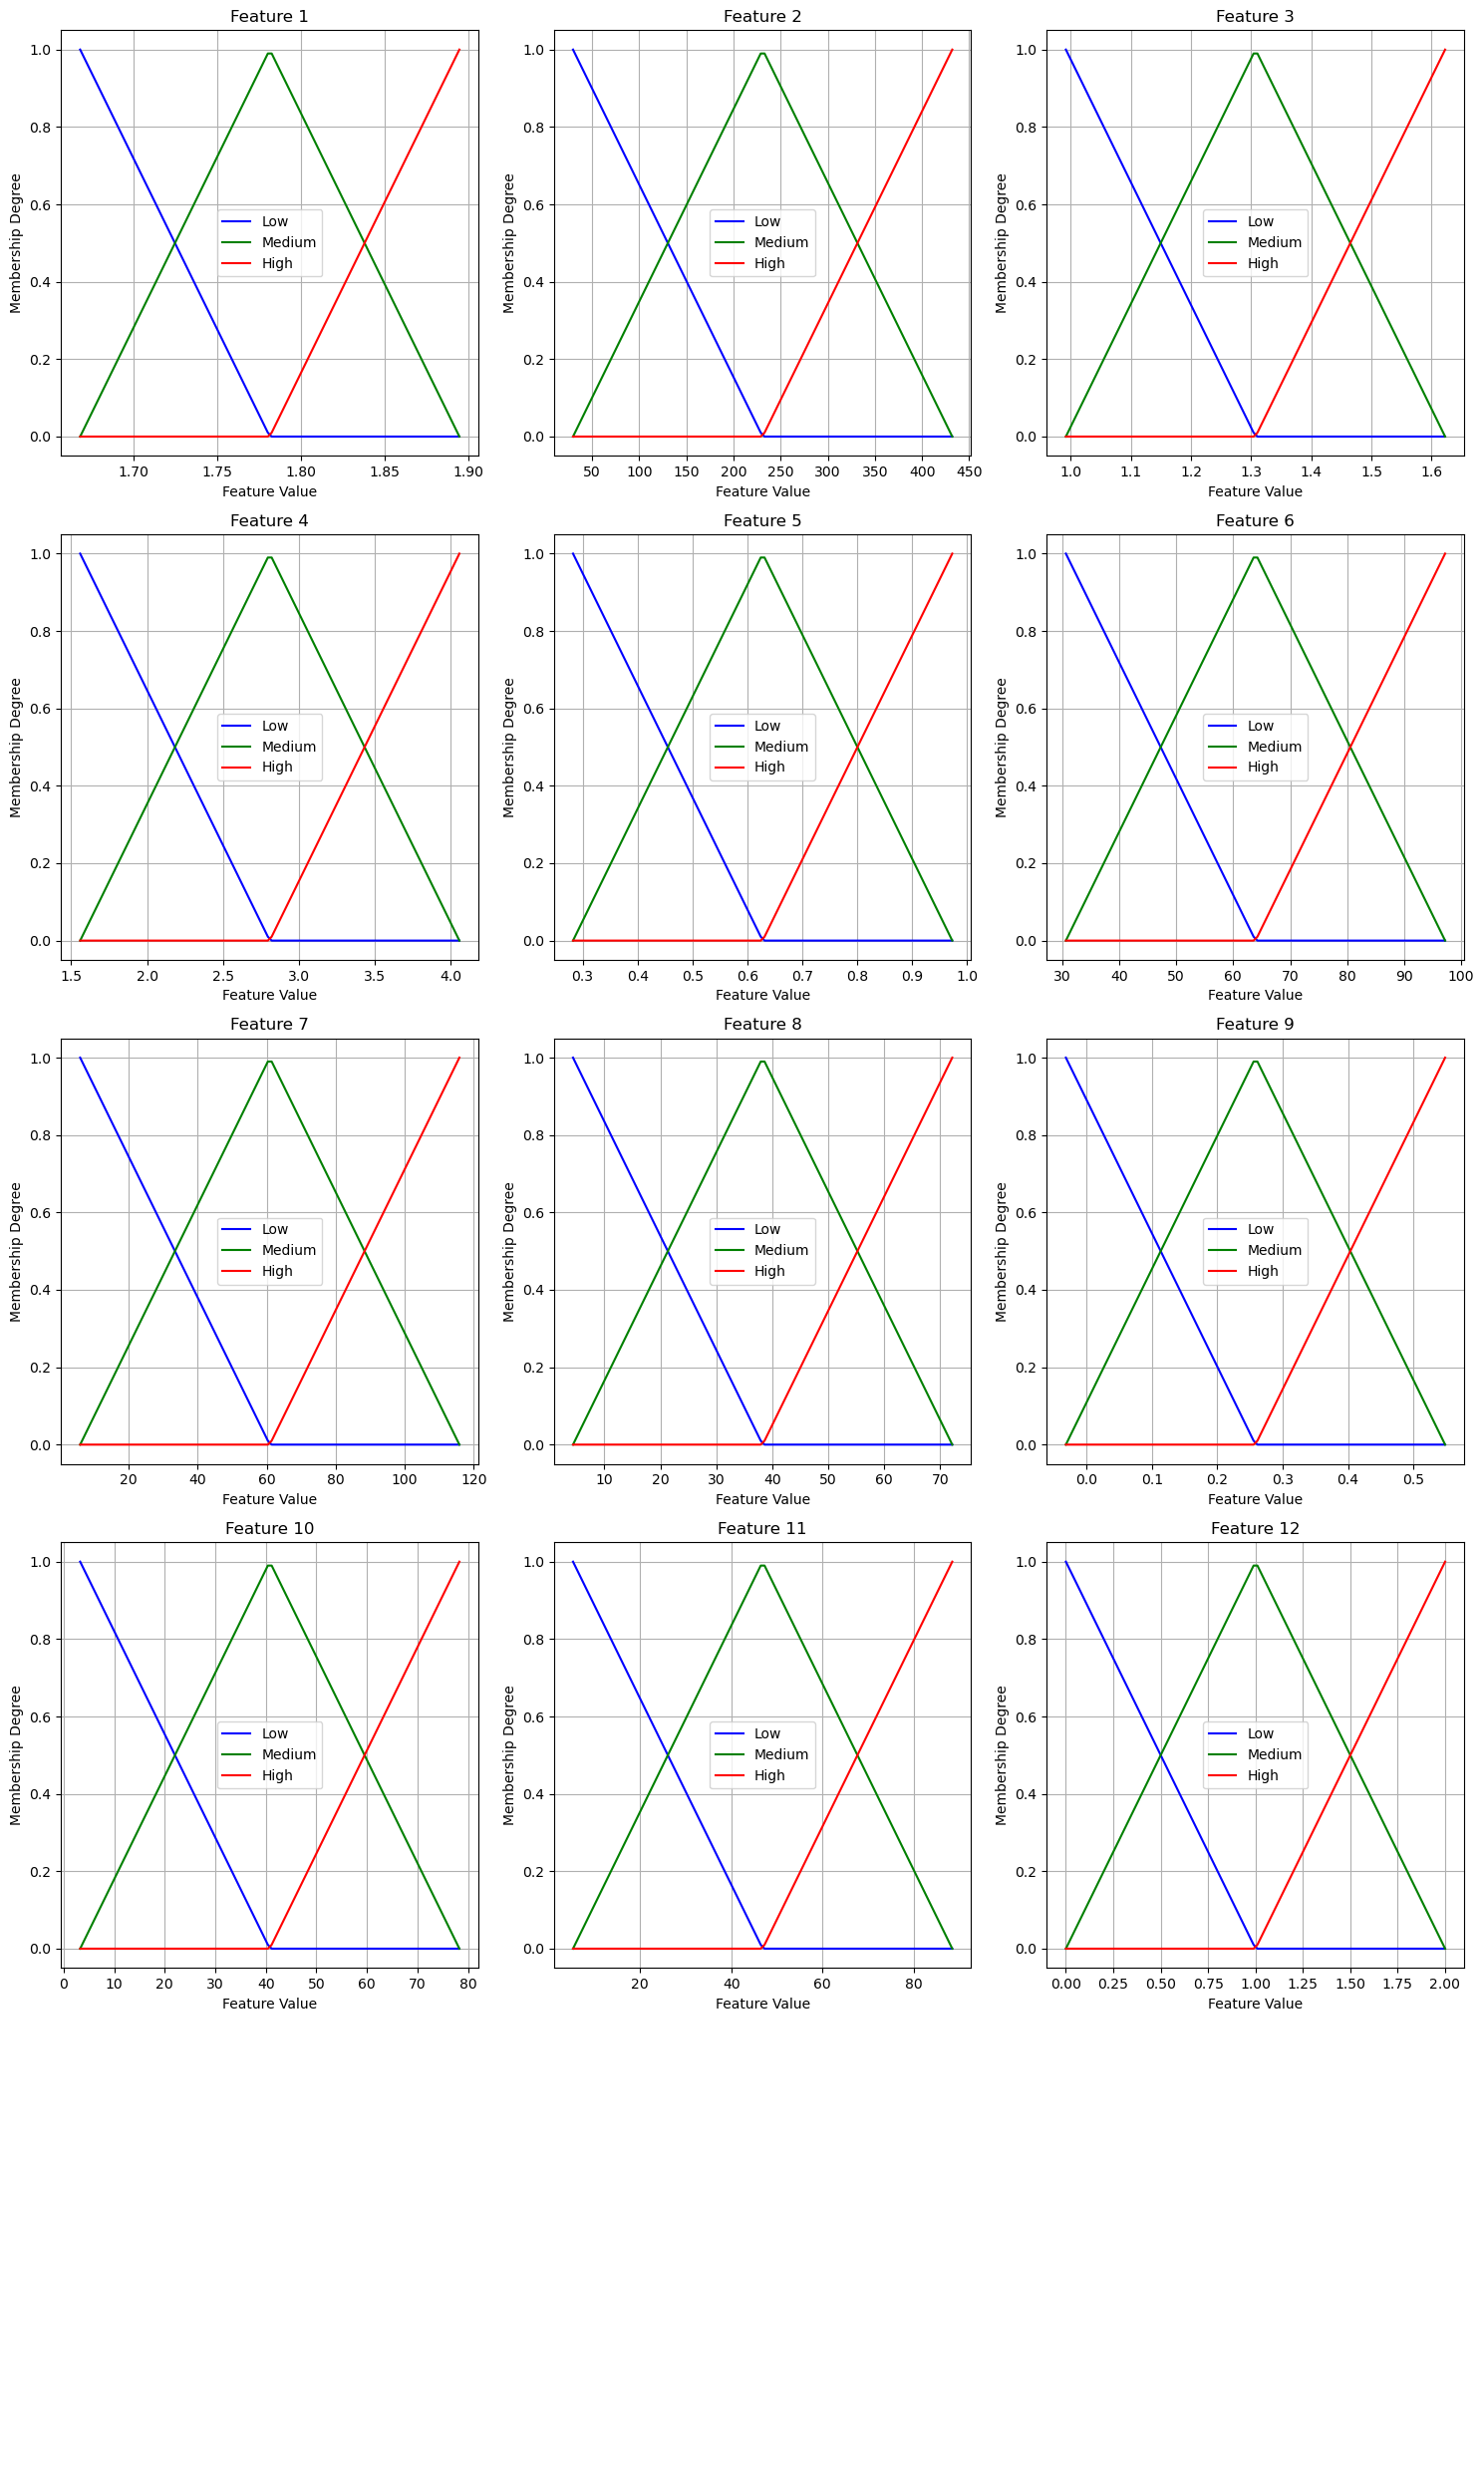

In [135]:
def visualize_all_features(data):
    """
    Visualize fuzzy membership functions for all features in the dataset.
    """
    n_features = data.shape[1]
    fig, axes = plt.subplots(n_features // 3 + 1, 3, figsize=(15, 5 * (n_features // 3 + 1)))
    axes = axes.flatten()
    
    for i in range(n_features):
        feature_values = data[:, i]
        min_val, max_val = np.min(feature_values), np.max(feature_values)
        x = np.linspace(min_val, max_val, 100)
        
        # Define membership functions
        mf_low = fuzz.trimf(x, [min_val, min_val, (min_val + max_val) / 2])
        mf_medium = fuzz.trimf(x, [min_val, (min_val + max_val) / 2, max_val])
        mf_high = fuzz.trimf(x, [(min_val + max_val) / 2, max_val, max_val])
        
        # Plot for this feature
        axes[i].plot(x, mf_low, label="Low", color='blue')
        axes[i].plot(x, mf_medium, label="Medium", color='green')
        axes[i].plot(x, mf_high, label="High", color='red')
        axes[i].set_title(f"Feature {i + 1}")
        axes[i].set_xlabel("Feature Value")
        axes[i].set_ylabel("Membership Degree")
        axes[i].legend()
        axes[i].grid()

    # Hide unused subplots
    for j in range(n_features, len(axes)):
        axes[j].axis("off")
    
    plt.tight_layout()
    plt.show()

# Visualize all features
visualize_all_features(X)


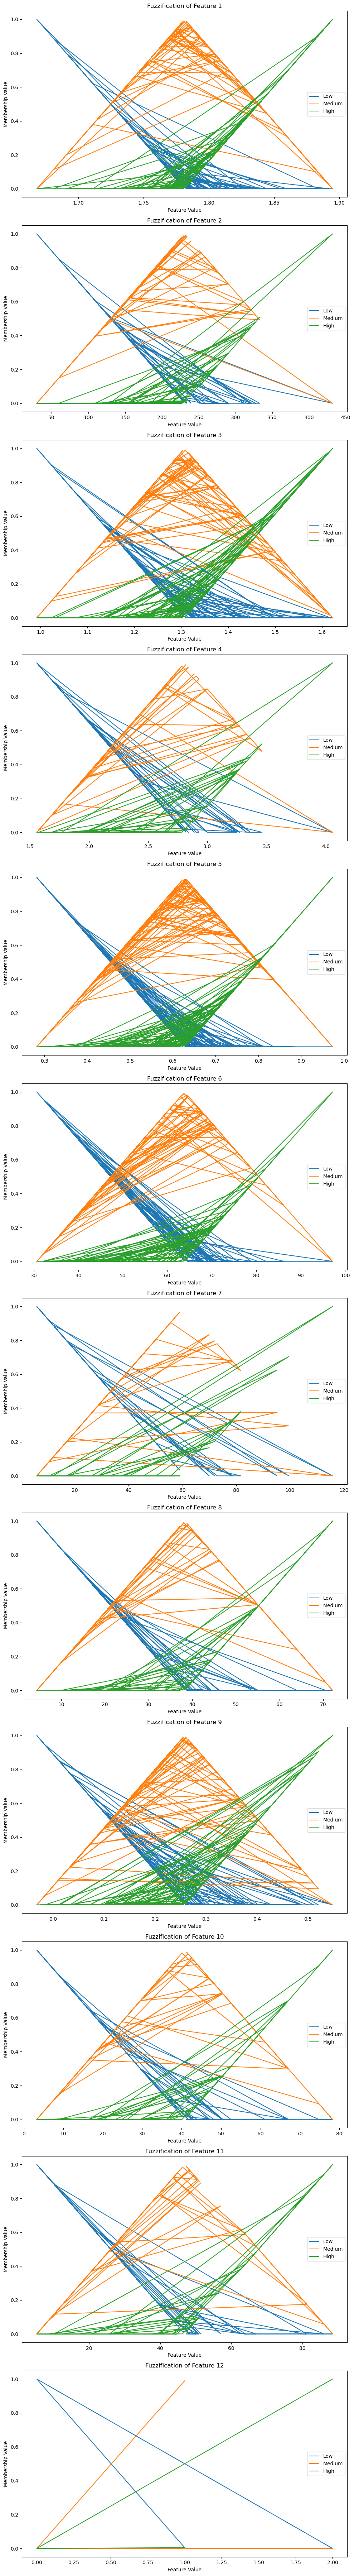

In [91]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Assuming final_dataset is a NumPy array or DataFrame where the last column is health (target variable)
X = final_dataset.iloc[:, :-1].values  # All features excluding the last column (health), convert to NumPy array
y = final_dataset.iloc[:, -1].values   # Health column (target label), convert to NumPy array

def fuzzify(data, n_memberships=3):
    fuzzified_data = []
    for feature in range(data.shape[1]):
        min_val, max_val = np.min(data[:, feature]), np.max(data[:, feature])
        x = np.linspace(min_val, max_val, 100)
        
        # Define triangular membership functions
        mf_low = fuzz.trimf(x, [min_val, min_val, (min_val + max_val) / 2])  # Low range
        mf_medium = fuzz.trimf(x, [min_val, (min_val + max_val) / 2, max_val])  # Medium range
        mf_high = fuzz.trimf(x, [(min_val + max_val) / 2, max_val, max_val])  # High range
        
        # Compute membership values for each data point (feature)
        feature_values = data[:, feature]
        fuzzified_feature = np.array([
            [fuzz.interp_membership(x, mf_low, v),
             fuzz.interp_membership(x, mf_medium, v),
             fuzz.interp_membership(x, mf_high, v)]
            for v in feature_values
        ])
        fuzzified_data.append(fuzzified_feature)
    
    # Return combined fuzzified data
    return np.array(fuzzified_data)

# Fuzzify the features in the dataset
fuzzified = fuzzify(X)

fig, axes = plt.subplots(nrows=X.shape[1], figsize=(10, 6 * X.shape[1]))

# If there's only one feature, axes will not be a 2D array, so make it iterable
if X.shape[1] == 1:
    axes = [axes]

# Plot the fuzzified memberships for each feature in a separate subplot
for i, feature_fuzzification in enumerate(fuzzified_dataset):
    ax = axes[i]  # Get the corresponding axis for each feature
    feature_values = X[:, i]
    
    for j, membership in enumerate(feature_fuzzification.T):  # Iterate over low, medium, high memberships
        ax.plot(feature_values, membership, label=f'{["Low", "Medium", "High"][j]}')

    ax.set_title(f'Fuzzification of Feature {i+1}')
    ax.set_xlabel('Feature Value')
    ax.set_ylabel('Membership Value')
    ax.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [17]:
print(type(fuzzified_dataset))

<class 'numpy.ndarray'>


In [18]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.utils import to_categorical

fuzzified_dataset = pd.DataFrame(fuzzified_dataset)  # Convert to DataFrame if it's an ndarray
species_column = pd.Series(X[:, -1], name='Species')
fuzzified_dataset['Species'] = species_column

# Split the dataset into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(fuzzified_dataset, y, test_size=0.2, random_state=123)

# One-hot encode the target labels for multiclass classification
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)

# Define the model

In [19]:
# Define a neural network model
model = Sequential()
model.add(Dense(10, input_dim=fuzzified_dataset.shape[1]))  # Hidden layer with no activation specified yet
model.add(LeakyReLU(alpha=0.1))  # Apply Leaky ReLU activation function with alpha=0.1
model.add(Dense(6))  # Third hidden layer with 6 neurons
model.add(LeakyReLU(alpha=0.1))  # LeakyReLU activation for third hidden layer

# Output layer with 3 neurons for multiclass (softmax activation)
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_one_hot, epochs=100, batch_size=10)

Epoch 1/100
20/20 [==============================] - 0s 3ms/step - loss: 1.1150 - accuracy: 0.3229
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0839 - accuracy: 0.3802
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 1.0553 - accuracy: 0.3906
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0257 - accuracy: 0.4115
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9933 - accuracy: 0.4740
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9491 - accuracy: 0.6510
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9026 - accuracy: 0.6979
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8480 - accuracy: 0.7135
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7929 - accuracy: 0.7135
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7348 - accuracy: 0.7344
Epoch 11/

In [20]:
# Evaluate the model on the training data
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f"Accuracy: {accuracy * 100:.2f}%")

2/2 [==============================] - 0s 5ms/step - loss: 0.0853 - accuracy: 0.9792
Accuracy: 97.92%


In [21]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert the predictions to class labels

# Convert the one-hot encoded true labels to class labels
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# Print the classification report
print(classification_report(y_true_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.95      1.00      0.97        19

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



### Rule extraction

In [22]:
# Predict probabilities for each cluster
y_pred_probs = model.predict(fuzzified_dataset)

# Get the predicted clusters (class with the highest probability)
y_pred = np.argmax(y_pred_probs, axis=1)

In [25]:
fuzzified_dataset.shape

(240, 34)

In [23]:
fuzzified_df = pd.DataFrame(fuzzified_dataset)

# Add the predicted clusters as a column
fuzzified_df['Cluster'] = y_pred

# Group by predicted cluster
grouped = fuzzified_df.groupby('Cluster').mean()

print(grouped)

#The grouped DataFrame will contain the average membership degree for each fuzzified 
#feature within each cluster. This tells you which membership functions dominate each cluster.

                0         1         2         3         4         5         6  \
Cluster                                                                         
0        0.186669  0.705728  0.107603  0.321532  0.617420  0.061048  0.270121   
1        0.037811  0.477605  0.484584  0.552024  0.436421  0.011555  0.050903   
2        0.035952  0.512542  0.451506  0.521597  0.469021  0.009382  0.294366   

                7         8         9  ...        24        25        26  \
Cluster                                ...                                 
0        0.685402  0.044477  0.628144  ...  0.136868  0.768709  0.094423   
1        0.550980  0.398117  0.315194  ...  0.134752  0.620496  0.244752   
2        0.693150  0.012484  0.746159  ...  0.587208  0.412490  0.000303   

               27        28        29        30        31        32   Species  
Cluster                                                                        
0        0.203582  0.649707  0.146711  0.236113  0.68

In [24]:
for cluster, row in grouped.iterrows():
    rule = f"IF "
    for i, value in enumerate(row[:-1]):  # Skip the last column (Cluster)
        if value > 0.6:  # Threshold for strong membership
            if i % 3 == 0:
                rule += f"Feature{i//3+1} is Low AND "
            elif i % 3 == 1:
                rule += f"Feature{i//3+1} is Medium AND "
            elif i % 3 == 2:
                rule += f"Feature{i//3+1} is High AND "
    rule = rule.rstrip(" AND ")  # Remove the trailing 'AND'
    rule += f" THEN Cluster = {cluster}"
    print(rule)

IF Feature1 is Medium AND Feature2 is Medium AND Feature3 is Medium AND Feature4 is Low AND Feature6 is Medium AND Feature8 is Medium AND Feature9 is Medium AND Feature10 is Medium AND Feature11 is Medium THEN Cluster = 0
IF Feature4 is Medium AND Feature5 is Medium AND Feature6 is Medium AND Feature7 is Low AND Feature8 is Low AND Feature9 is Medium AND Feature10 is Low AND Feature11 is Low THEN Cluster = 1
IF Feature3 is Medium AND Feature4 is Low AND Feature5 is Medium AND Feature7 is Low AND Feature10 is Low AND Feature11 is Low THEN Cluster = 2


In [28]:
# Assuming fuzzified_dataset_with_species contains the fuzzified data and the 'Species' column
fuzzified_dataset_with_species = pd.DataFrame(fuzzified_dataset)  # if it's not already in DataFrame form

# Add 'Species' column (directly from X)
species_column = pd.Series(X[:, -1], name='Species')
fuzzified_dataset_with_species['Species'] = species_column

# Group by both 'Species' and 'Cluster' for rule generation
for cluster in range(3):  # Assuming 3 clusters as in the model's output
    cluster_data = fuzzified_dataset_with_species[y_pred == cluster]
    
    for species in cluster_data['Species'].unique():
        # Generate the rule for each species and cluster combination
        rule = f"IF "
        species_data = cluster_data[cluster_data['Species'] == species]
        
        for i, value in enumerate(species_data.iloc[0, :-1]):  # Skip the last column (Cluster)
            if value > 0.6:  # Threshold for strong membership
                if i % 3 == 0:
                    rule += f"Feature{i//3+1} is Low AND "
                elif i % 3 == 1:
                    rule += f"Feature{i//3+1} is Medium AND "
                elif i % 3 == 2:
                    rule += f"Feature{i//3+1} is High AND "
        
        # Add condition for the specific 'Species' value
        rule += f"Species = {species} AND "
        
        rule = rule.rstrip(" AND ")  # Remove the trailing 'AND'
        rule += f" THEN Cluster = {cluster}"
        
        # Print the rule
        print(rule)

IF Feature1 is Medium AND Feature2 is Medium AND Feature3 is Low AND Feature4 is Low AND Feature5 is Low AND Feature6 is Medium AND Feature10 is Medium AND Feature11 is Medium AND Species = 1.0 THEN Cluster = 0
IF Feature1 is Medium AND Feature2 is Medium AND Feature3 is Medium AND Feature5 is High AND Feature6 is Medium AND Feature8 is Medium AND Feature9 is Medium AND Feature10 is Medium AND Feature11 is Medium AND Species = 0.0 THEN Cluster = 0
IF Feature1 is High AND Feature2 is Medium AND Feature3 is Medium AND Feature4 is Low AND Feature6 is Medium AND Feature7 is Medium AND Feature8 is Medium AND Feature9 is Medium AND Feature10 is Medium AND Feature11 is Medium AND Species = 2.0 THEN Cluster = 0
IF Feature1 is Medium AND Feature3 is High AND Feature4 is Medium AND Feature6 is Medium AND Feature7 is Medium AND Feature9 is Medium AND Feature10 is Low AND Feature11 is Low AND Species = 1.0 THEN Cluster = 1
IF Feature2 is Low AND Feature4 is Low AND Feature6 is Medium AND Feature7 

In [29]:
correct_classifications = 0
total_points = len(fuzzified_df)
for index, row in fuzzified_df.iterrows():
    predicted_cluster = y_pred[index]
    if predicted_cluster == int(row['Cluster']):
        correct_classifications += 1
accuracy = correct_classifications / total_points * 100
print(f"Rule coverage accuracy: {accuracy:.2f}%")

Rule coverage accuracy: 100.00%


In [30]:
def get_membership_ranges(data):
    ranges = {}
    for feature_idx in range(data.shape[1]):
        min_val, max_val = np.min(data[:, feature_idx]), np.max(data[:, feature_idx])
        mid_val = (min_val + max_val) / 2
        
        # Define the ranges
        ranges[f"Feature{feature_idx+1}"] = {
            "Low": (min_val, mid_val),
            "Medium": (min_val, max_val),
            "High": (mid_val, max_val)
        }
    return ranges

ranges = get_membership_ranges(X)
for feature, range_info in ranges.items():
    print(f"{feature}: {range_info}")


Feature1: {'Low': (1.6681243486816957, 1.7814749037653144), 'Medium': (1.6681243486816957, 1.8948254588489333), 'High': (1.7814749037653144, 1.8948254588489333)}
Feature2: {'Low': (29.817644, 230.93843700000002), 'Medium': (29.817644, 432.05923), 'High': (230.93843700000002, 432.05923)}
Feature3: {'Low': (0.991949396267735, 1.3072496630576915), 'Medium': (0.991949396267735, 1.6225499298476482), 'High': (1.3072496630576915, 1.6225499298476482)}
Feature4: {'Low': (1.5588230709343909, 2.807982384446953), 'Medium': (1.5588230709343909, 4.057141697959515), 'High': (2.807982384446953, 4.057141697959515)}
Feature5: {'Low': (0.282352924567475, 0.6278430640615239), 'Medium': (0.282352924567475, 0.9733332035555728), 'High': (0.6278430640615239, 0.9733332035555728)}
Feature6: {'Low': (30.658828243850596, 63.91530643116528), 'Medium': (30.658828243850596, 97.17178461847996), 'High': (63.91530643116528, 97.17178461847996)}
Feature7: {'Low': (5.889533, 60.8573795), 'Medium': (5.889533, 115.825226), 